In [ ]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=0b783c7365e7449282288e06cbcbeeaca483e1e5b7cc7cc1cd51bcb64525e8fa
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [ ]:
!python -m medmnist available

MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/
All available datasets:
	pathmnist       | PathMNIST       | Size: 28 (default), 64, 128, 224.
	chestmnist      | ChestMNIST      | Size: 28 (default), 64, 128, 224.
	dermamnist      | DermaMNIST      | Size: 28 (default), 64, 128, 224.
	octmnist        | OCTMNIST        | Size: 28 (default), 64, 128, 224.
	pneumoniamnist  | PneumoniaMNIST  | Size: 28 (default), 64, 128, 224.
	retinamnist     | RetinaMNIST     | Size: 28 (default), 64, 128, 224.
	breastmnist     | BreastMNIST     | Size: 28 (default), 64, 128, 224.
	bloodmnist      | BloodMNIST      | Size: 28 (default), 64, 128, 224.
	tissuemnist     | TissueMNIST     | Size: 28 (default), 64, 128, 224.
	organamnist     | OrganAMNIST     | Size: 28 (default), 64, 128, 224.
	organcmnist     | OrganCMNIST     | Size: 28 (default), 64, 128, 224.
	organsmnist     | OrganSMNIST     | Size: 28 (default), 64, 128, 224.
	organmnist3d    | OrganMNIST3D    | Size: 28 (default), 64.
	nodule

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.4 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import medmnist
import timm
from medmnist import BloodMNIST, INFO
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set random seed
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

# Dataset information
data_flag = 'bloodmnist'
info = INFO[data_flag]
n_classes = len(info['label'])
classes = info['label']
BloodMNIST = getattr(medmnist, info['python_class'])
print(classes)

MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/
{'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}


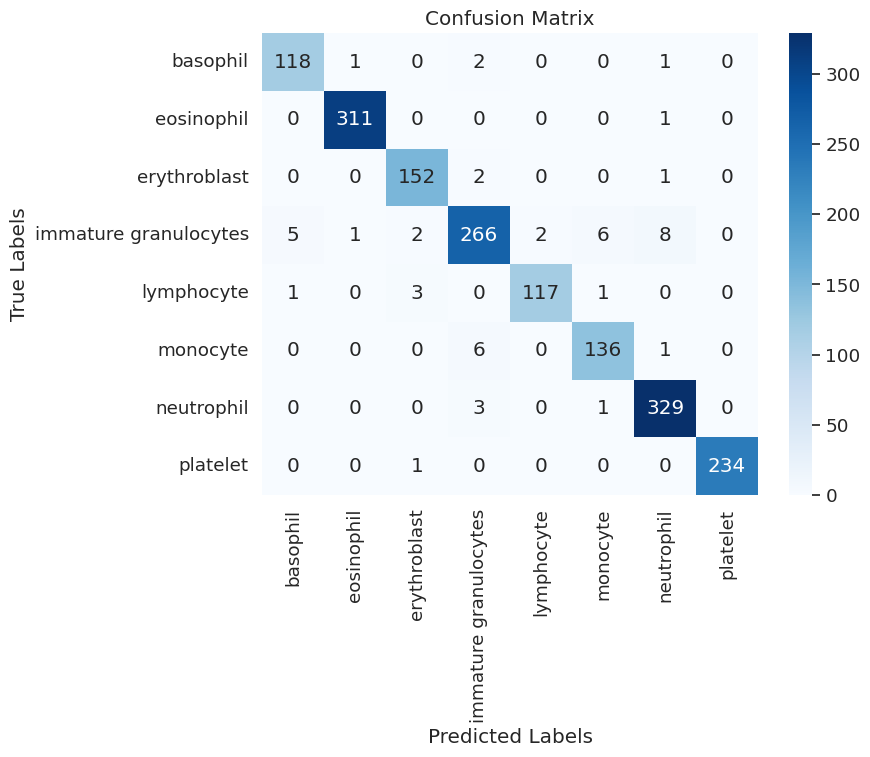

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the true labels and predicted labels
true_labels = ["basophil", "eosinophil", "erythroblast", "immature granulocytes", "lymphocyte", "monocyte", "neutrophil", "platelet"]
predicted_labels = ["basophil", "eosinophil", "erythroblast", "immature granulocytes", "lymphocyte", "monocyte", "neutrophil", "platelet"]

# Define the confusion matrix values
confusion_matrix_values = np.array([[118, 1, 0, 2, 0, 0, 1, 0],
                                    [0, 311, 0, 0, 0, 0, 1, 0],
                                    [0, 0, 152, 2, 0, 0, 1, 0],
                                    [5, 1, 2, 266, 2, 6, 8, 0],
                                    [1, 0, 3, 0, 117, 1, 0, 0],
                                    [0, 0, 0, 6, 0, 136, 1, 0],
                                    [0, 0, 0, 3, 0, 1, 329, 0],
                                    [0, 0, 1, 0, 0, 0, 0, 234]])

# Create the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix_values, annot=True, cmap="Blues", fmt='g', xticklabels=true_labels, yticklabels=true_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=600)
plt.show()




## **Swin transformer training**

MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


100%|██████████| 374/374 [00:31<00:00, 11.71it/s]


Epoch 1/35: Training Loss: 1.2191, Training Accuracy: 64.97%
Confusion Matrix: 
[[ 59   3   3  35  13   4   5   0]
 [  1 289   0   8   0   6   8   0]
 [  1   3 102  15   8   1   9  16]
 [  2   9  10 211   7  17  34   0]
 [  0   1  19   3  92   0   5   2]
 [  0  14   0  53   3  69   4   0]
 [  0   7   2   4   0   2 318   0]
 [  0   0   8   1   1   0   5 220]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.48      0.64       122
           1       0.89      0.93      0.91       312
           2       0.71      0.66      0.68       155
           3       0.64      0.73      0.68       290
           4       0.74      0.75      0.75       122
           5       0.70      0.48      0.57       143
           6       0.82      0.95      0.88       333
           7       0.92      0.94      0.93       235

    accuracy                           0.79      1712
   macro avg       0.79      0.74      0.75      1712
weighted avg       

100%|██████████| 374/374 [00:32<00:00, 11.64it/s]


Epoch 2/35: Training Loss: 0.6703, Training Accuracy: 79.30%
Confusion Matrix: 
[[ 79   4   2  23   9   3   2   0]
 [  1 294   0   4   0   4   9   0]
 [  1   2  80  13  17   1  11  30]
 [  6   7   4 199  12  28  34   0]
 [  0   0   3   1 113   1   3   1]
 [  2   6   0  34   3  93   5   0]
 [  0   5   1   5   0   0 322   0]
 [  0   0   3   0   1   0   4 227]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       122
           1       0.92      0.94      0.93       312
           2       0.86      0.52      0.65       155
           3       0.71      0.69      0.70       290
           4       0.73      0.93      0.82       122
           5       0.72      0.65      0.68       143
           6       0.83      0.97      0.89       333
           7       0.88      0.97      0.92       235

    accuracy                           0.82      1712
   macro avg       0.82      0.79      0.79      1712
weighted avg       

100%|██████████| 374/374 [00:32<00:00, 11.66it/s]


Epoch 3/35: Training Loss: 0.5695, Training Accuracy: 82.08%
Confusion Matrix: 
[[ 86   4   2  23   6   1   0   0]
 [  1 301   0   5   0   1   4   0]
 [  1   0  97  16  16   0   8  17]
 [  7   6   5 234   9   8  21   0]
 [  0   0   3   4 113   0   2   0]
 [  5  11   0  46   1  77   3   0]
 [  0   7   1   7   0   0 318   0]
 [  0   0   5   1   1   0   3 225]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       122
           1       0.91      0.96      0.94       312
           2       0.86      0.63      0.72       155
           3       0.70      0.81      0.75       290
           4       0.77      0.93      0.84       122
           5       0.89      0.54      0.67       143
           6       0.89      0.95      0.92       333
           7       0.93      0.96      0.94       235

    accuracy                           0.85      1712
   macro avg       0.85      0.81      0.82      1712
weighted avg       

100%|██████████| 374/374 [00:31<00:00, 11.70it/s]


Epoch 4/35: Training Loss: 0.5130, Training Accuracy: 83.34%
Confusion Matrix: 
[[ 81   1   2  30   6   2   0   0]
 [  1 301   0   6   0   1   3   0]
 [  1   0 105  15  11   1   4  18]
 [  5   7   5 234   6  14  19   0]
 [  0   0   4   5 111   0   2   0]
 [  3   6   0  42   1  89   2   0]
 [  0   7   1   6   0   1 318   0]
 [  0   0   5   0   1   0   1 228]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.66      0.76       122
           1       0.93      0.96      0.95       312
           2       0.86      0.68      0.76       155
           3       0.69      0.81      0.75       290
           4       0.82      0.91      0.86       122
           5       0.82      0.62      0.71       143
           6       0.91      0.95      0.93       333
           7       0.93      0.97      0.95       235

    accuracy                           0.86      1712
   macro avg       0.86      0.82      0.83      1712
weighted avg       

100%|██████████| 374/374 [00:32<00:00, 11.68it/s]


Epoch 5/35: Training Loss: 0.4801, Training Accuracy: 84.30%
Confusion Matrix: 
[[ 90   2   2  19   7   2   0   0]
 [  1 302   0   4   0   2   3   0]
 [  1   0 110  14   9   1   5  15]
 [  7   6   6 230   6  14  21   0]
 [  0   0   4   3 113   1   1   0]
 [  3   5   0  35   1  97   2   0]
 [  0   6   1   5   0   1 320   0]
 [  0   0   6   0   1   0   1 227]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       122
           1       0.94      0.97      0.95       312
           2       0.85      0.71      0.77       155
           3       0.74      0.79      0.77       290
           4       0.82      0.93      0.87       122
           5       0.82      0.68      0.74       143
           6       0.91      0.96      0.93       333
           7       0.94      0.97      0.95       235

    accuracy                           0.87      1712
   macro avg       0.86      0.84      0.85      1712
weighted avg       

100%|██████████| 374/374 [00:32<00:00, 11.65it/s]


Epoch 6/35: Training Loss: 0.4595, Training Accuracy: 84.91%
Confusion Matrix: 
[[ 94   2   2  15   7   2   0   0]
 [  2 301   0   3   0   3   3   0]
 [  1   0 114  13   8   1   5  13]
 [  8   6   9 221   8  16  22   0]
 [  0   0   5   3 112   1   1   0]
 [  3   5   0  28   1 105   1   0]
 [  1   6   1   4   0   1 320   0]
 [  0   0   4   0   1   0   1 229]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       122
           1       0.94      0.96      0.95       312
           2       0.84      0.74      0.79       155
           3       0.77      0.76      0.77       290
           4       0.82      0.92      0.86       122
           5       0.81      0.73      0.77       143
           6       0.91      0.96      0.93       333
           7       0.95      0.97      0.96       235

    accuracy                           0.87      1712
   macro avg       0.86      0.85      0.86      1712
weighted avg       

100%|██████████| 374/374 [00:31<00:00, 11.69it/s]


Epoch 7/35: Training Loss: 0.4338, Training Accuracy: 85.71%
Confusion Matrix: 
[[ 95   3   3  12   6   3   0   0]
 [  2 303   1   2   0   2   2   0]
 [  1   0 129   9   3   2   4   7]
 [ 12   6  15 211   6  22  18   0]
 [  0   0   9   3 108   1   1   0]
 [  4   5   0  24   1 108   1   0]
 [  1   6   2   5   0   1 318   0]
 [  0   0   7   0   1   0   1 226]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       122
           1       0.94      0.97      0.95       312
           2       0.78      0.83      0.80       155
           3       0.79      0.73      0.76       290
           4       0.86      0.89      0.87       122
           5       0.78      0.76      0.77       143
           6       0.92      0.95      0.94       333
           7       0.97      0.96      0.97       235

    accuracy                           0.88      1712
   macro avg       0.86      0.86      0.86      1712
weighted avg       

100%|██████████| 374/374 [00:32<00:00, 11.68it/s]


Epoch 8/35: Training Loss: 0.4205, Training Accuracy: 85.90%
Confusion Matrix: 
[[ 94   1   3  15   6   2   1   0]
 [  2 295   2   3   0   1   9   0]
 [  1   0 134   8   1   0   4   7]
 [  8   6  15 217   5  16  23   0]
 [  0   0  12   4 104   1   1   0]
 [  2   2   0  25   1 111   2   0]
 [  0   1   1   3   0   1 327   0]
 [  0   0   8   0   1   0   3 223]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       122
           1       0.97      0.95      0.96       312
           2       0.77      0.86      0.81       155
           3       0.79      0.75      0.77       290
           4       0.88      0.85      0.87       122
           5       0.84      0.78      0.81       143
           6       0.88      0.98      0.93       333
           7       0.97      0.95      0.96       235

    accuracy                           0.88      1712
   macro avg       0.87      0.86      0.87      1712
weighted avg       

100%|██████████| 374/374 [00:31<00:00, 11.71it/s]


Epoch 9/35: Training Loss: 0.4069, Training Accuracy: 86.50%
Confusion Matrix: 
[[103   1   2   7   6   3   0   0]
 [  2 303   1   2   0   2   2   0]
 [  2   0 121   5   6   4   4  13]
 [ 23   7  10 193   8  32  17   0]
 [  1   1   4   1 113   1   1   0]
 [  4   3   0  17   1 118   0   0]
 [  1   7   0   5   0   1 319   0]
 [  0   0   2   0   1   0   1 231]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       122
           1       0.94      0.97      0.96       312
           2       0.86      0.78      0.82       155
           3       0.84      0.67      0.74       290
           4       0.84      0.93      0.88       122
           5       0.73      0.83      0.78       143
           6       0.93      0.96      0.94       333
           7       0.95      0.98      0.96       235

    accuracy                           0.88      1712
   macro avg       0.86      0.87      0.86      1712
weighted avg       

100%|██████████| 374/374 [00:32<00:00, 11.66it/s]


Epoch 10/35: Training Loss: 0.3975, Training Accuracy: 86.65%
Confusion Matrix: 
[[ 94   0   2  19   6   1   0   0]
 [  2 299   1   5   0   1   4   0]
 [  1   0 122  12   7   0   4   9]
 [  8   4  11 233   7  11  16   0]
 [  0   0   4   3 114   0   1   0]
 [  5   5   0  37   1  93   2   0]
 [  1   3   0   5   0   1 323   0]
 [  0   0   3   0   1   0   1 230]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       122
           1       0.96      0.96      0.96       312
           2       0.85      0.79      0.82       155
           3       0.74      0.80      0.77       290
           4       0.84      0.93      0.88       122
           5       0.87      0.65      0.74       143
           6       0.92      0.97      0.94       333
           7       0.96      0.98      0.97       235

    accuracy                           0.88      1712
   macro avg       0.87      0.86      0.86      1712
weighted avg      

100%|██████████| 374/374 [00:32<00:00, 11.63it/s]


Epoch 11/35: Training Loss: 0.3839, Training Accuracy: 87.44%
Confusion Matrix: 
[[ 96   0   2  17   6   1   0   0]
 [  2 301   0   6   0   1   2   0]
 [  1   0 122  15   4   0   4   9]
 [  8   7  10 240   6   8  11   0]
 [  0   0   5   5 111   0   1   0]
 [  5   8   0  44   1  84   1   0]
 [  1   8   0   8   0   0 316   0]
 [  0   0   3   0   1   0   0 231]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       122
           1       0.93      0.96      0.95       312
           2       0.86      0.79      0.82       155
           3       0.72      0.83      0.77       290
           4       0.86      0.91      0.88       122
           5       0.89      0.59      0.71       143
           6       0.94      0.95      0.95       333
           7       0.96      0.98      0.97       235

    accuracy                           0.88      1712
   macro avg       0.88      0.85      0.86      1712
weighted avg      

100%|██████████| 374/374 [00:32<00:00, 11.67it/s]


Epoch 12/35: Training Loss: 0.3750, Training Accuracy: 87.45%
Confusion Matrix: 
[[ 98   1   2  15   5   1   0   0]
 [  2 300   2   2   0   1   5   0]
 [  1   0 132   9   2   0   4   7]
 [ 11   6  13 230   5   8  17   0]
 [  2   0   8   3 108   0   1   0]
 [  5   8   0  36   1  91   2   0]
 [  1   4   1   4   0   1 322   0]
 [  0   0   3   0   1   0   1 230]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       122
           1       0.94      0.96      0.95       312
           2       0.82      0.85      0.84       155
           3       0.77      0.79      0.78       290
           4       0.89      0.89      0.89       122
           5       0.89      0.64      0.74       143
           6       0.91      0.97      0.94       333
           7       0.97      0.98      0.97       235

    accuracy                           0.88      1712
   macro avg       0.88      0.86      0.87      1712
weighted avg      

100%|██████████| 374/374 [00:32<00:00, 11.68it/s]


Epoch 13/35: Training Loss: 0.3736, Training Accuracy: 87.44%
Confusion Matrix: 
[[ 88   2   4  21   6   1   0   0]
 [  0 305   2   2   0   1   2   0]
 [  1   0 127  10   5   0   4   8]
 [  7   8  11 237   6   8  13   0]
 [  0   0   5   4 112   0   1   0]
 [  4   8   0  34   1  96   0   0]
 [  1   8   1   6   0   1 316   0]
 [  0   0   3   0   1   0   0 231]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       122
           1       0.92      0.98      0.95       312
           2       0.83      0.82      0.82       155
           3       0.75      0.82      0.78       290
           4       0.85      0.92      0.89       122
           5       0.90      0.67      0.77       143
           6       0.94      0.95      0.94       333
           7       0.97      0.98      0.97       235

    accuracy                           0.88      1712
   macro avg       0.88      0.86      0.87      1712
weighted avg      

100%|██████████| 374/374 [00:32<00:00, 11.62it/s]


Epoch 14/35: Training Loss: 0.3648, Training Accuracy: 87.75%
Confusion Matrix: 
[[ 91   0   2  23   5   1   0   0]
 [  2 300   1   6   0   2   1   0]
 [  1   0 123  15   4   0   4   8]
 [  8   3   8 248   6   9   8   0]
 [  0   0   4   7 110   0   1   0]
 [  4   5   0  38   1  95   0   0]
 [  1   8   0   8   0   1 315   0]
 [  0   0   4   0   1   0   0 230]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.75      0.79       122
           1       0.95      0.96      0.96       312
           2       0.87      0.79      0.83       155
           3       0.72      0.86      0.78       290
           4       0.87      0.90      0.88       122
           5       0.88      0.66      0.76       143
           6       0.96      0.95      0.95       333
           7       0.97      0.98      0.97       235

    accuracy                           0.88      1712
   macro avg       0.88      0.86      0.87      1712
weighted avg      

100%|██████████| 374/374 [00:32<00:00, 11.64it/s]


Epoch 15/35: Training Loss: 0.3538, Training Accuracy: 88.01%
Confusion Matrix: 
[[104   0   2  10   3   3   0   0]
 [  2 298   0   6   0   4   2   0]
 [  1   0 119  13   7   3   4   8]
 [ 16   3   7 220   6  21  17   0]
 [  2   0   4   3 111   1   1   0]
 [  3   1   0  16   1 122   0   0]
 [  1   3   0   6   0   1 322   0]
 [  0   0   2   0   1   0   0 232]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       122
           1       0.98      0.96      0.97       312
           2       0.89      0.77      0.82       155
           3       0.80      0.76      0.78       290
           4       0.86      0.91      0.88       122
           5       0.79      0.85      0.82       143
           6       0.93      0.97      0.95       333
           7       0.97      0.99      0.98       235

    accuracy                           0.89      1712
   macro avg       0.88      0.88      0.88      1712
weighted avg      

100%|██████████| 374/374 [00:31<00:00, 11.70it/s]


Epoch 16/35: Training Loss: 0.3583, Training Accuracy: 87.85%
Confusion Matrix: 
[[ 97   2   2  13   6   2   0   0]
 [  1 304   1   3   0   1   2   0]
 [  1   1 125  12   5   0   4   7]
 [  9   6  10 235   6   9  15   0]
 [  1   1   4   3 112   0   1   0]
 [  4   8   0  32   1  98   0   0]
 [  1   8   0   5   0   1 318   0]
 [  0   0   3   0   1   0   0 231]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       122
           1       0.92      0.97      0.95       312
           2       0.86      0.81      0.83       155
           3       0.78      0.81      0.79       290
           4       0.85      0.92      0.89       122
           5       0.88      0.69      0.77       143
           6       0.94      0.95      0.95       333
           7       0.97      0.98      0.98       235

    accuracy                           0.89      1712
   macro avg       0.88      0.87      0.87      1712
weighted avg      

100%|██████████| 374/374 [00:31<00:00, 11.69it/s]


Epoch 17/35: Training Loss: 0.3509, Training Accuracy: 88.20%
Confusion Matrix: 
[[105   0   2   7   4   4   0   0]
 [  1 304   0   2   0   2   3   0]
 [  1   1 131   5   3   4   4   6]
 [ 16   6  12 193   6  36  21   0]
 [  2   1   7   2 108   1   1   0]
 [  3   5   0  10   1 123   1   0]
 [  0   3   0   4   0   1 325   0]
 [  0   0   3   0   1   0   1 230]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       122
           1       0.95      0.97      0.96       312
           2       0.85      0.85      0.85       155
           3       0.87      0.67      0.75       290
           4       0.88      0.89      0.88       122
           5       0.72      0.86      0.78       143
           6       0.91      0.98      0.94       333
           7       0.97      0.98      0.98       235

    accuracy                           0.89      1712
   macro avg       0.87      0.88      0.87      1712
weighted avg      

100%|██████████| 374/374 [00:31<00:00, 11.71it/s]


Epoch 18/35: Training Loss: 0.3437, Training Accuracy: 88.36%
Confusion Matrix: 
[[ 99   0   2  13   7   1   0   0]
 [  2 298   1   6   0   1   4   0]
 [  1   0 132   8   5   0   4   5]
 [  9   3  13 238   8   9  10   0]
 [  0   0   5   4 112   0   1   0]
 [  5   3   0  39   1  94   1   0]
 [  1   2   1   5   1   1 322   0]
 [  0   0   4   0   1   0   0 230]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       122
           1       0.97      0.96      0.96       312
           2       0.84      0.85      0.84       155
           3       0.76      0.82      0.79       290
           4       0.83      0.92      0.87       122
           5       0.89      0.66      0.76       143
           6       0.94      0.97      0.95       333
           7       0.98      0.98      0.98       235

    accuracy                           0.89      1712
   macro avg       0.88      0.87      0.87      1712
weighted avg      

100%|██████████| 374/374 [00:31<00:00, 11.73it/s]


Epoch 19/35: Training Loss: 0.3345, Training Accuracy: 88.74%
Confusion Matrix: 
[[102   1   2   8   5   4   0   0]
 [  1 303   0   2   0   2   4   0]
 [  1   1 123   5   6   4   4  11]
 [ 14   7  11 185   7  44  22   0]
 [  2   1   5   2 110   1   1   0]
 [  2   5   0   8   1 127   0   0]
 [  0   4   0   4   0   1 324   0]
 [  0   0   2   0   1   0   0 232]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       122
           1       0.94      0.97      0.96       312
           2       0.86      0.79      0.83       155
           3       0.86      0.64      0.73       290
           4       0.85      0.90      0.87       122
           5       0.69      0.89      0.78       143
           6       0.91      0.97      0.94       333
           7       0.95      0.99      0.97       235

    accuracy                           0.88      1712
   macro avg       0.86      0.87      0.86      1712
weighted avg      

100%|██████████| 374/374 [00:31<00:00, 11.72it/s]


Epoch 20/35: Training Loss: 0.3311, Training Accuracy: 88.64%
Confusion Matrix: 
[[102   0   2  12   5   1   0   0]
 [  2 304   0   3   0   2   1   0]
 [  1   0 133   8   3   0   3   7]
 [ 15   6  12 228   7  11  11   0]
 [  2   1   7   2 109   0   1   0]
 [  5   6   0  29   1 102   0   0]
 [  1   7   1   5   0   1 318   0]
 [  0   0   4   0   1   0   0 230]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       122
           1       0.94      0.97      0.96       312
           2       0.84      0.86      0.85       155
           3       0.79      0.79      0.79       290
           4       0.87      0.89      0.88       122
           5       0.87      0.71      0.78       143
           6       0.95      0.95      0.95       333
           7       0.97      0.98      0.97       235

    accuracy                           0.89      1712
   macro avg       0.88      0.87      0.88      1712
weighted avg      

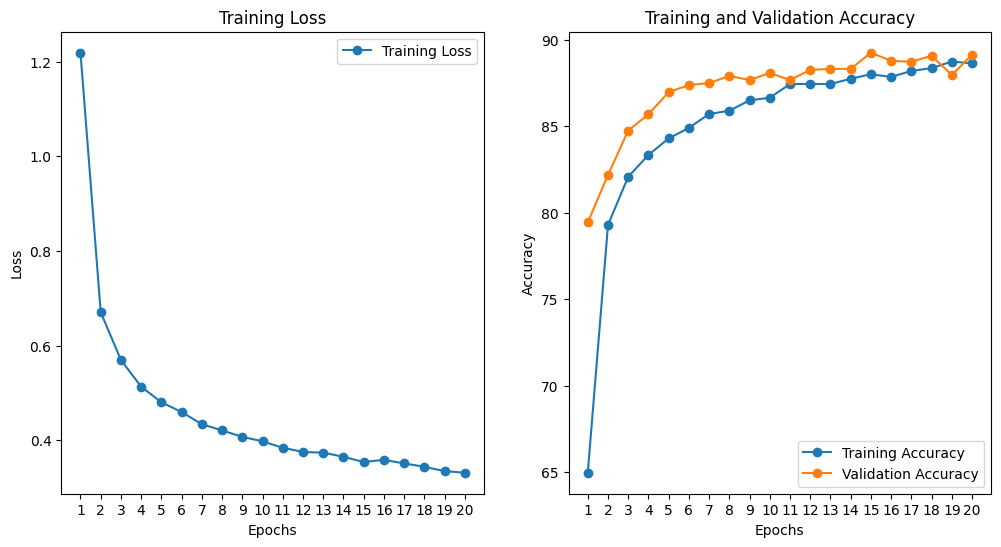

==> Evaluating on Training Set...
Confusion Matrix: 
[[ 747   11   10   54   21    8    1    0]
 [   7 2142    3   14    3    1   11    0]
 [  10    6  951   45   35    1    9   28]
 [  85   34   22 1732   27   79   47    0]
 [  22    4   31   31  759    0    2    0]
 [  41    6    1  210   12  709   14    0]
 [   5   37   22   35    1    7 2223    0]
 [   1    1   18    1    4    0    0 1618]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       852
           1       0.96      0.98      0.97      2181
           2       0.90      0.88      0.89      1085
           3       0.82      0.85      0.84      2026
           4       0.88      0.89      0.89       849
           5       0.88      0.71      0.79       993
           6       0.96      0.95      0.96      2330
           7       0.98      0.98      0.98      1643

    accuracy                           0.91     11959
   macro avg       0.90      0.89   

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import medmnist
import timm
from medmnist import BloodMNIST, INFO
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set random seed
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

# Dataset information
data_flag = 'bloodmnist'
info = INFO[data_flag]
n_classes = len(info['label'])
classes = info['label']
BloodMNIST = getattr(medmnist, info['python_class'])

# Preprocessing
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# Load datasets
train_dataset = BloodMNIST(split="train", download=True, transform=data_transform)
val_dataset = BloodMNIST(split="val", download=True, transform=data_transform)
test_dataset = BloodMNIST(split='test', transform=data_transform, download=True)

# Data loaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Custom Model
class CustomSwinModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomSwinModel, self).__init__()
        self.swin = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True)

        # Freeze all layers in the network
        for param in self.swin.parameters():
            param.requires_grad = False

        # Unfreeze the last few layers. The exact layers to unfreeze depend on the model architecture.
        for param in self.swin.head.parameters():
            param.requires_grad = True

        # modify the classifier (head):
        num_features = self.swin.head.in_features
        self.classifier = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.swin(x)

# Initialize model
model = CustomSwinModel(num_classes=n_classes)

# Set device to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Directories for saving outputs
os.makedirs("models", exist_ok=True)

# Implement early stopping mechanism
early_stopping_patience = 5
no_improvement_epochs = 0
best_val_accuracy = 0

# Evaluation Function (Corrected)
def evaluate_model(loader):
    model.eval()
    total_correct = 0
    total = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.squeeze()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    print(f'Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}')
    print(f'Classification Report: \n{classification_report(y_true, y_pred, target_names=classes)}')
    print(total_correct)
    print(total)
    accuracy = 100 * total_correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy, y_true, y_pred

NUM_EPOCHS = 35

# Training and Validation Metrics
train_losses = []
train_accuracies = []
test_accuracies = []
# Training loop
for epoch in range(NUM_EPOCHS):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        labels = labels.squeeze().long()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Compute training metrics
    epoch_loss = train_loss / len(train_loader)
    epoch_accuracy = 100 * train_correct / train_total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)


    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}: Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.2f}%')
    # Evaluate on validation set (instead of test set)
    val_accuracy, _, _ = evaluate_model(val_loader)
    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}: Validation Accuracy: {val_accuracy}')
    test_accuracies.append(val_accuracy)

    # Check for early stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_epochs = 0
        # Save the best model
        best_model_state_dict = model.state_dict()
    else:
        no_improvement_epochs += 1
        if no_improvement_epochs >= early_stopping_patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break

# Save the best model
best_model_filename = f"models/{data_flag}_best_model.pt"
torch.save(best_model_state_dict, best_model_filename)

# Plotting with dots at each epoch
plt.figure(figsize=(12, 6))

# Plot for Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xticks(range(1, len(train_losses) + 1))  # Ensure x-axis ticks match the number of epochs
plt.legend()

# Plot for Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', linestyle='-', marker='o')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Validation Accuracy', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks(range(1, max(len(train_accuracies), len(test_accuracies)) + 1))  # Ensure x-axis ticks match the number of epochs
plt.legend()

plt.show()

# Evaluate on training and test sets
print('==> Evaluating on Training Set...')
train_accuracy, y_true, y_pred = evaluate_model(train_loader)
print(f'Training Set Accuracy: {train_accuracy:.2f}%')
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))

print('==> Evaluating on Test Set...')
test_accuracy, y_true, y_pred = evaluate_model(val_loader)
print(f'Test Set Accuracy: {test_accuracy:.2f}%')
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))


# **EfficientNet_b1 training**

MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/
{'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}


100%|██████████| 35461855/35461855 [00:02<00:00, 15583040.56it/s]


Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/31.5M [00:00<?, ?B/s]

100%|██████████| 374/374 [00:38<00:00,  9.68it/s]


Epoch 1/35: Training Loss: 0.9924, Training Accuracy: 70.63%
Confusion Matrix: 
[[ 87   5   0  14  10   4   2   0   0   0]
 [  0 297   0   4   0   1   8   2   0   0]
 [  2   4 111  16   5   0   8   8   1   0]
 [ 13   2   6 219  10  27  13   0   0   0]
 [  1   2  14  12  87   4   2   0   0   0]
 [  3   1   0  43   0  95   1   0   0   0]
 [  0   9   3  10   1   4 303   2   0   1]
 [  0   0   4   0   0   0   0 231   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       122
           1       0.93      0.95      0.94       312
           2       0.80      0.72      0.76       155
           3       0.69      0.76      0.72       290
           4       0.77      0.71      0.74       122
           5       0.70      0.66      0.68       143
           6       0.90      0.91      0.90       333
           7       0.95      0.9

100%|██████████| 374/374 [00:36<00:00, 10.20it/s]


Epoch 2/35: Training Loss: 0.4748, Training Accuracy: 84.00%
Confusion Matrix: 
[[102   2   0   7   7   2   2   0   0]
 [  1 295   0   4   0   1  10   1   0]
 [  2   1 119  13   5   0   9   5   1]
 [ 16   0   8 205  10  33  18   0   0]
 [  5   0  11   9  92   3   2   0   0]
 [  5   0   0  27   0 110   1   0   0]
 [  1   2   2   3   1   1 322   1   0]
 [  0   0   2   0   0   0   0 233   0]
 [  0   0   0   0   0   0   0   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       122
           1       0.98      0.95      0.96       312
           2       0.84      0.77      0.80       155
           3       0.76      0.71      0.73       290
           4       0.80      0.75      0.78       122
           5       0.73      0.77      0.75       143
           6       0.88      0.97      0.92       333
           7       0.97      0.99      0.98       235

   micro avg       0.86      0.86      0.86      1712
  

100%|██████████| 374/374 [00:37<00:00, 10.10it/s]


Epoch 3/35: Training Loss: 0.4036, Training Accuracy: 86.15%
Confusion Matrix: 
[[ 96   2   0   7  11   4   2   0]
 [  0 299   0   5   0   0   7   1]
 [  2   1 124  13  10   0   3   2]
 [ 13   1   8 200  15  36  17   0]
 [  3   0   7   2 108   1   1   0]
 [  1   0   0  28   1 112   1   0]
 [  2   3   3   4   1   2 317   1]
 [  0   0   2   0   0   0   0 233]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       122
           1       0.98      0.96      0.97       312
           2       0.86      0.80      0.83       155
           3       0.77      0.69      0.73       290
           4       0.74      0.89      0.81       122
           5       0.72      0.78      0.75       143
           6       0.91      0.95      0.93       333
           7       0.98      0.99      0.99       235

    accuracy                           0.87      1712
   macro avg       0.85      0.86      0.85      1712
weighted avg       

100%|██████████| 374/374 [00:36<00:00, 10.16it/s]


Epoch 4/35: Training Loss: 0.3688, Training Accuracy: 87.32%
Confusion Matrix: 
[[ 97   2   0  15   4   1   3   0]
 [  0 296   0   8   0   0   7   1]
 [  2   1 121  16   7   0   5   3]
 [  8   0   7 245   7   8  15   0]
 [  3   1   9  10  98   0   1   0]
 [  6   0   0  56   0  80   1   0]
 [  2   0   1   7   1   1 321   0]
 [  0   0   1   0   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       122
           1       0.99      0.95      0.97       312
           2       0.87      0.78      0.82       155
           3       0.69      0.84      0.76       290
           4       0.84      0.80      0.82       122
           5       0.89      0.56      0.69       143
           6       0.91      0.96      0.94       333
           7       0.98      1.00      0.99       235

    accuracy                           0.87      1712
   macro avg       0.87      0.84      0.85      1712
weighted avg       

100%|██████████| 374/374 [00:36<00:00, 10.27it/s]


Epoch 5/35: Training Loss: 0.3378, Training Accuracy: 88.54%
Confusion Matrix: 
[[100   3   0  10   5   2   2   0]
 [  0 297   0   5   0   0   9   1]
 [  2   1 126  13   7   0   5   1]
 [ 15   1   6 207  11  31  19   0]
 [  3   0   8   3 106   1   1   0]
 [  5   0   0  33   0 104   1   0]
 [  2   3   1   6   1   2 318   0]
 [  0   0   1   0   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       122
           1       0.97      0.95      0.96       312
           2       0.89      0.81      0.85       155
           3       0.75      0.71      0.73       290
           4       0.82      0.87      0.84       122
           5       0.74      0.73      0.73       143
           6       0.90      0.95      0.92       333
           7       0.99      1.00      0.99       235

    accuracy                           0.87      1712
   macro avg       0.86      0.86      0.85      1712
weighted avg       

100%|██████████| 374/374 [00:36<00:00, 10.26it/s]


Epoch 6/35: Training Loss: 0.3200, Training Accuracy: 88.66%
Confusion Matrix: 
[[ 98   3   0   8   8   3   2   0]
 [  0 296   0   7   0   1   7   1]
 [  2   1 130  11   6   0   3   2]
 [ 16   1   9 205   8  34  17   0]
 [  4   1  11   3 100   1   1   1]
 [  2   0   0  30   0 111   0   0]
 [  1   2   3   7   1   3 316   0]
 [  0   0   1   0   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       122
           1       0.97      0.95      0.96       312
           2       0.84      0.84      0.84       155
           3       0.76      0.71      0.73       290
           4       0.81      0.82      0.82       122
           5       0.73      0.78      0.75       143
           6       0.91      0.95      0.93       333
           7       0.98      1.00      0.99       235

    accuracy                           0.87      1712
   macro avg       0.85      0.85      0.85      1712
weighted avg       

100%|██████████| 374/374 [00:36<00:00, 10.29it/s]


Epoch 7/35: Training Loss: 0.3052, Training Accuracy: 89.57%
Confusion Matrix: 
[[105   2   1   5   3   3   3   0]
 [  0 296   0   5   0   1   9   1]
 [  2   1 133   7   4   0   5   3]
 [ 16   1   7 185   9  49  22   1]
 [  5   1  11   3  96   2   3   1]
 [  2   0   0  15   0 126   0   0]
 [  2   1   2   4   0   2 322   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       122
           1       0.98      0.95      0.96       312
           2       0.86      0.86      0.86       155
           3       0.83      0.64      0.72       290
           4       0.86      0.79      0.82       122
           5       0.69      0.88      0.77       143
           6       0.88      0.97      0.92       333
           7       0.98      1.00      0.99       235

    accuracy                           0.88      1712
   macro avg       0.86      0.87      0.86      1712
weighted avg       

100%|██████████| 374/374 [00:36<00:00, 10.26it/s]


Epoch 8/35: Training Loss: 0.2898, Training Accuracy: 90.00%
Confusion Matrix: 
[[104   1   0   7   7   2   1   0]
 [  0 297   0   6   0   0   8   1]
 [  2   1 119  16  14   0   0   3]
 [ 17   0   4 202  16  36  15   0]
 [  3   0   1   3 113   1   1   0]
 [  2   0   0  29   1 111   0   0]
 [  2   2   1   6   1   3 318   0]
 [  0   0   0   1   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       122
           1       0.99      0.95      0.97       312
           2       0.95      0.77      0.85       155
           3       0.75      0.70      0.72       290
           4       0.74      0.93      0.82       122
           5       0.73      0.78      0.75       143
           6       0.93      0.95      0.94       333
           7       0.98      1.00      0.99       235

    accuracy                           0.88      1712
   macro avg       0.86      0.87      0.86      1712
weighted avg       

100%|██████████| 374/374 [00:36<00:00, 10.24it/s]


Epoch 9/35: Training Loss: 0.2817, Training Accuracy: 90.22%
Confusion Matrix: 
[[103   2   0   8   3   3   3   0]
 [  0 296   0   6   0   0   9   1]
 [  2   1 133   9   2   0   6   2]
 [ 18   1   7 211   6  26  21   0]
 [  5   1  10   6  94   3   2   1]
 [  3   0   0  32   0 107   1   0]
 [  2   1   1   4   0   3 322   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       122
           1       0.98      0.95      0.96       312
           2       0.88      0.86      0.87       155
           3       0.76      0.73      0.75       290
           4       0.90      0.77      0.83       122
           5       0.75      0.75      0.75       143
           6       0.88      0.97      0.92       333
           7       0.98      1.00      0.99       235

    accuracy                           0.88      1712
   macro avg       0.86      0.86      0.86      1712
weighted avg       

100%|██████████| 374/374 [00:36<00:00, 10.23it/s]


Epoch 10/35: Training Loss: 0.2706, Training Accuracy: 90.75%
Confusion Matrix: 
[[ 94   2   0  15   7   2   2   0]
 [  0 295   0   7   0   0   9   1]
 [  1   1 135   9   7   0   1   1]
 [  7   0   8 232   8  16  19   0]
 [  3   1   8   5 102   1   1   1]
 [  2   0   0  38   0 102   1   0]
 [  2   1   3   7   1   2 317   0]
 [  0   0   0   1   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       122
           1       0.98      0.95      0.96       312
           2       0.88      0.87      0.87       155
           3       0.74      0.80      0.77       290
           4       0.82      0.84      0.83       122
           5       0.83      0.71      0.77       143
           6       0.91      0.95      0.93       333
           7       0.99      1.00      0.99       235

    accuracy                           0.88      1712
   macro avg       0.87      0.86      0.87      1712
weighted avg      

100%|██████████| 374/374 [00:36<00:00, 10.36it/s]


Epoch 11/35: Training Loss: 0.2617, Training Accuracy: 91.04%
Confusion Matrix: 
[[ 92   2   0  23   3   1   1   0]
 [  0 298   0   7   0   0   6   1]
 [  2   2 125  17   6   0   2   1]
 [  8   1   4 245   7  10  14   1]
 [  4   1   3  10 100   1   2   1]
 [  4   0   0  50   0  88   1   0]
 [  2   3   3   8   0   2 315   0]
 [  0   0   0   1   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       122
           1       0.97      0.96      0.96       312
           2       0.93      0.81      0.86       155
           3       0.68      0.84      0.75       290
           4       0.86      0.82      0.84       122
           5       0.86      0.62      0.72       143
           6       0.92      0.95      0.93       333
           7       0.98      1.00      0.99       235

    accuracy                           0.87      1712
   macro avg       0.88      0.84      0.86      1712
weighted avg      

100%|██████████| 374/374 [00:36<00:00, 10.33it/s]


Epoch 12/35: Training Loss: 0.2547, Training Accuracy: 91.25%
Confusion Matrix: 
[[100   3   0   8   8   1   2   0]
 [  0 298   0   5   0   0   8   1]
 [  2   2 131  10   8   0   2   0]
 [ 15   2   6 215  14  18  20   0]
 [  4   1   5   3 107   1   1   0]
 [  4   0   0  36   0 103   0   0]
 [  2   2   3   5   0   2 319   0]
 [  0   0   0   1   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       122
           1       0.97      0.96      0.96       312
           2       0.90      0.85      0.87       155
           3       0.76      0.74      0.75       290
           4       0.78      0.88      0.83       122
           5       0.82      0.72      0.77       143
           6       0.91      0.96      0.93       333
           7       1.00      1.00      1.00       235

    accuracy                           0.88      1712
   macro avg       0.87      0.86      0.86      1712
weighted avg      

100%|██████████| 374/374 [00:36<00:00, 10.24it/s]


Epoch 13/35: Training Loss: 0.2421, Training Accuracy: 91.64%
Confusion Matrix: 
[[ 92   3   0  16   7   2   2   0]
 [  0 298   0   5   0   0   8   1]
 [  1   1 130  14   6   0   3   0]
 [  8   1   7 221   8  23  21   1]
 [  3   1   6   6 102   1   2   1]
 [  2   0   0  34   0 107   0   0]
 [  2   2   3   6   0   2 318   0]
 [  0   0   0   1   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       122
           1       0.97      0.96      0.96       312
           2       0.89      0.84      0.86       155
           3       0.73      0.76      0.75       290
           4       0.83      0.84      0.83       122
           5       0.79      0.75      0.77       143
           6       0.90      0.95      0.93       333
           7       0.99      1.00      0.99       235

    accuracy                           0.88      1712
   macro avg       0.87      0.86      0.86      1712
weighted avg      

100%|██████████| 374/374 [00:36<00:00, 10.16it/s]


Epoch 14/35: Training Loss: 0.2378, Training Accuracy: 91.67%
Confusion Matrix: 
[[ 98   2   0  10   8   2   2   0]
 [  0 296   0   4   0   1  10   1]
 [  1   1 128  12  10   0   1   2]
 [ 12   0   6 216  13  22  20   1]
 [  4   0   3   3 110   1   1   0]
 [  2   0   0  37   0 104   0   0]
 [  2   1   3   7   0   2 318   0]
 [  0   0   0   1   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       122
           1       0.99      0.95      0.97       312
           2       0.91      0.83      0.87       155
           3       0.74      0.74      0.74       290
           4       0.78      0.90      0.84       122
           5       0.79      0.73      0.76       143
           6       0.90      0.95      0.93       333
           7       0.98      1.00      0.99       235

    accuracy                           0.88      1712
   macro avg       0.87      0.86      0.86      1712
weighted avg      

100%|██████████| 374/374 [00:36<00:00, 10.19it/s]


Epoch 15/35: Training Loss: 0.2333, Training Accuracy: 91.95%
Confusion Matrix: 
[[101   3   0   9   4   2   3   0]
 [  0 299   0   3   0   1   8   1]
 [  2   2 129   8   5   0   8   1]
 [ 12   2   4 208   8  30  25   1]
 [  3   1   5   5 106   0   2   0]
 [  3   0   0  32   0 107   1   0]
 [  2   2   2   4   0   2 321   0]
 [  0   0   0   1   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       122
           1       0.97      0.96      0.96       312
           2       0.92      0.83      0.87       155
           3       0.77      0.72      0.74       290
           4       0.86      0.87      0.87       122
           5       0.75      0.75      0.75       143
           6       0.87      0.96      0.92       333
           7       0.99      1.00      0.99       235

    accuracy                           0.88      1712
   macro avg       0.87      0.86      0.87      1712
weighted avg      

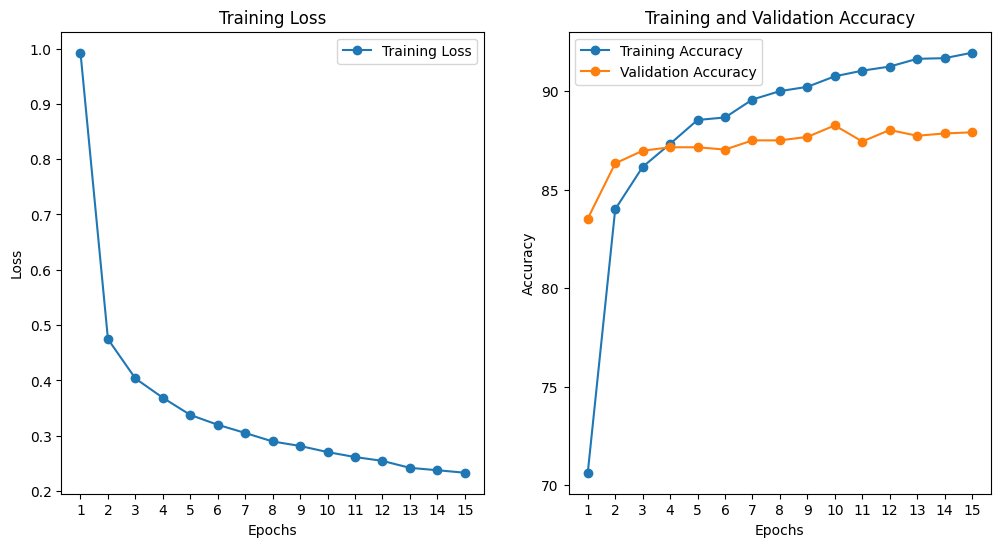

NameError: name 'y_true' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import medmnist
import timm
from medmnist import BloodMNIST, INFO
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix

# Set random seed
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

# Dataset information
data_flag = 'bloodmnist'
info = INFO[data_flag]
n_classes = len(info['label'])
classes = info['label']
BloodMNIST = getattr(medmnist, info['python_class'])
print(classes)

# Preprocessing
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# Load datasets
train_dataset = BloodMNIST(split="train", download=True, transform=data_transform)
val_dataset = BloodMNIST(split="val", download=True, transform=data_transform)
test_dataset = BloodMNIST(split='test', transform=data_transform, download=True)

# Data loaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Custom Model
class CustomEfficientModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomEfficientModel, self).__init__()
        self.Efficient = timm.create_model('efficientnet_b1', pretrained=True)
        # Freeze all layers in the network
        for param in self.Efficient.parameters():
            param.requires_grad = False

        # Unfreeze the last few layers. The exact layers to unfreeze depend on the model architecture.
        for param in self.Efficient.classifier.parameters():
            param.requires_grad = True

        # modify the classifier (head):
        num_features = self.Efficient.classifier.in_features
        self.classifier = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.Efficient(x)

# Initialize model
model = CustomEfficientModel(num_classes=n_classes)

# Set device to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Directories for saving outputs
os.makedirs("models", exist_ok=True)

# Implement early stopping mechanism
early_stopping_patience = 5
no_improvement_epochs = 0
best_val_accuracy = 0

# Evaluation Function (Corrected)
def evaluate_model(loader):
    model.eval()
    total_correct = 0
    total = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.squeeze()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Find the unique classes present in y_true
    unique_classes = list(set(y_true))

    print(f'Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}')

    # Use the 'labels' parameter to specify unique_classes
    print(f'Classification Report: \n{classification_report(y_true, y_pred, labels=unique_classes, target_names=info["label"])}')
    print(total_correct)
    print(total)
    accuracy = 100 * total_correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy, y_true, y_pred


NUM_EPOCHS = 35

# Training and Validation Metrics
train_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(NUM_EPOCHS):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        labels = labels.squeeze().long()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Compute training metrics
    epoch_loss = train_loss / len(train_loader)
    epoch_accuracy = 100 * train_correct / train_total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}: Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.2f}%')
    # Evaluate on validation set (instead of test set)
    val_accuracy, _, _ = evaluate_model(val_loader)
    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}: Validation Accuracy: {val_accuracy}')
    test_accuracies.append(val_accuracy)

    # Check for early stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_epochs = 0
        # Save the best model
        best_model_state_dict = model.state_dict()
    else:
        no_improvement_epochs += 1
        if no_improvement_epochs >= early_stopping_patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break

# Save the best model
best_model_filename = f"models/{data_flag}_best_model.pt"
torch.save(best_model_state_dict, best_model_filename)

# Plotting with dots at each epoch
plt.figure(figsize=(12, 6))

# Plot for Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xticks(range(1, len(train_losses) + 1))  # Ensure x-axis ticks match the number of epochs
plt.legend()

# Plot for Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', linestyle='-', marker='o')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Validation Accuracy', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks(range(1, max(len(train_accuracies), len(test_accuracies)) + 1))  # Ensure x-axis ticks match the number of epochs
plt.legend()

plt.show()

unique_classes = list(set(y_true))

# Evaluate on training and test sets
print('==> Evaluating on Training Set...')
train_accuracy, y_true, y_pred = evaluate_model(train_loader)
print(f'Training Set Accuracy: {train_accuracy:.2f}%')
print("Classification Report:")
print(classification_report(y_true, y_pred, labels=unique_classes, target_names=classes))
# Micro-average
micro_precision = precision_score(y_true, y_pred, average='micro')
micro_recall = recall_score(y_true, y_pred, average='micro')
micro_f1 = f1_score(y_true, y_pred, average='micro')

# Macro-average
macro_precision = precision_score(y_true, y_pred, average='macro')
macro_recall = recall_score(y_true, y_pred, average='macro')
macro_f1 = f1_score(y_true, y_pred, average='macro')

print(f"Micro-average Precision: {micro_precision}")
print(f"Micro-average Recall: {micro_recall}")
print(f"Micro-average F1-Score: {micro_f1}")

print(f"Macro-average Precision: {macro_precision}")
print(f"Macro-average Recall: {macro_recall}")
print(f"Macro-average F1-Score: {macro_f1}")

print('==> Evaluating on Test Set...')
test_accuracy, y_true, y_pred = evaluate_model(test_loader)
print(f'Test Set Accuracy: {test_accuracy:.2f}%')
print("Classification Report:")
print(classification_report(y_true, y_pred, labels=unique_classes, target_names=classes))
# Micro-average
micro_precision = precision_score(y_true, y_pred, average='micro')
micro_recall = recall_score(y_true, y_pred, average='micro')
micro_f1 = f1_score(y_true, y_pred, average='micro')

# Macro-average
macro_precision = precision_score(y_true, y_pred, average='macro')
macro_recall = recall_score(y_true, y_pred, average='macro')
macro_f1 = f1_score(y_true, y_pred, average='macro')

print(f"Micro-average Precision: {micro_precision}")
print(f"Micro-average Recall: {micro_recall}")
print(f"Micro-average F1-Score: {micro_f1}")

print(f"Macro-average Precision: {macro_precision}")
print(f"Macro-average Recall: {macro_recall}")
print(f"Macro-average F1-Score: {macro_f1}")



## **Hybrid model of EfficientNet and Swin Transfomrer**

MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/
{'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


100%|██████████| 374/374 [00:26<00:00, 14.28it/s]


Epoch 1/35: Training Loss: 1.3472, Training Accuracy: 58.07%
Confusion Matrix: 
[[ 65   4   1  18  12  10  12   0   0   0   0]
 [  5 267   2   8   1   5  20   3   1   0   0]
 [  2   2  79   8  12   3  19  30   0   0   0]
 [ 25  11   6 163  10  33  39   1   0   1   1]
 [  9   1   6  12  85   3   3   3   0   0   0]
 [ 11   2   0  50   1  71   8   0   0   0   0]
 [  3   6   5  17   3   1 292   6   0   0   0]
 [  0   2   9   1   0   0  11 212   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.54      0.53      0.54       122
           1       0.91      0.86      0.88       312
           2       0.73      0.51      0.60       155
           3       0.59      0.56      0.57       290
           4       0.69      0.70      0.69       122
           5       0.56      0.50      0.53       143

100%|██████████| 374/374 [00:26<00:00, 14.25it/s]


Epoch 2/35: Training Loss: 0.7220, Training Accuracy: 74.97%
Confusion Matrix: 
[[ 54   5   1  31  12  13   6   0   0]
 [  2 274   3  12   1   2  15   3   0]
 [  1   1  88  12  18   1  13  21   0]
 [  9   9   7 195   7  37  25   1   0]
 [  3   0   3  15  92   4   3   2   0]
 [  4   2   0  45   1  87   4   0   0]
 [  3   5   5  25   4   1 284   6   0]
 [  0   2   6   1   0   0   6 219   1]
 [  0   0   0   0   0   0   0   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.44      0.55       122
           1       0.92      0.88      0.90       312
           2       0.78      0.57      0.66       155
           3       0.58      0.67      0.62       290
           4       0.68      0.75      0.72       122
           5       0.60      0.61      0.60       143
           6       0.80      0.85      0.82       333
           7       0.87      0.93      0.90       235

   micro avg       0.76      0.76      0.76      1712
  

100%|██████████| 374/374 [00:26<00:00, 14.18it/s]


Epoch 3/35: Training Loss: 0.6315, Training Accuracy: 78.49%
Confusion Matrix: 
[[ 70   5   0  15   8  13  11   0]
 [  4 283   1   1   1   2  19   1]
 [  2   1  94   8  16   1  15  18]
 [ 15  10   9 162  10  50  34   0]
 [  6   1   9   4  94   4   2   2]
 [  8   2   1  28   0  96   8   0]
 [  2   9   4  13   1   3 298   3]
 [  0   1   5   1   0   0   8 220]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.57      0.61       122
           1       0.91      0.91      0.91       312
           2       0.76      0.61      0.68       155
           3       0.70      0.56      0.62       290
           4       0.72      0.77      0.75       122
           5       0.57      0.67      0.62       143
           6       0.75      0.89      0.82       333
           7       0.90      0.94      0.92       235

    accuracy                           0.77      1712
   macro avg       0.75      0.74      0.74      1712
weighted avg       

100%|██████████| 374/374 [00:26<00:00, 14.31it/s]


Epoch 4/35: Training Loss: 0.5702, Training Accuracy: 80.43%
Confusion Matrix: 
[[ 64   5   1  26   6  14   6   0   0   0]
 [  3 286   2   4   1   3  12   1   0   0]
 [  2   1 106   9  11   1  12  13   0   0]
 [  9   9   9 192   4  38  29   0   0   0]
 [  5   1  14  11  84   5   2   0   0   0]
 [  6   2   1  46   0  83   5   0   0   0]
 [  3   8   6  17   1   3 293   2   0   0]
 [  0   1   8   1   0   0   4 219   1   1]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.52      0.60       122
           1       0.91      0.92      0.92       312
           2       0.72      0.68      0.70       155
           3       0.63      0.66      0.64       290
           4       0.79      0.69      0.73       122
           5       0.56      0.58      0.57       143
           6       0.81      0.88      0.84       333
           7       0.93      0.9

100%|██████████| 374/374 [00:26<00:00, 14.26it/s]


Epoch 5/35: Training Loss: 0.5404, Training Accuracy: 81.37%
Confusion Matrix: 
[[ 75   5   0  23   6   9   4   0   0   0]
 [  4 288   0   6   0   1  12   1   0   0]
 [  4   1 102   9  11   1  12  15   0   0]
 [ 12   8  10 197   6  31  26   0   0   0]
 [  8   1  11   8  87   3   2   2   0   0]
 [  7   1   1  51   0  79   4   0   0   0]
 [  4   8   5  18   1   3 291   3   0   0]
 [  0   0   6   1   0   0   5 221   1   1]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.61      0.64       122
           1       0.92      0.92      0.92       312
           2       0.76      0.66      0.70       155
           3       0.63      0.68      0.65       290
           4       0.78      0.71      0.75       122
           5       0.62      0.55      0.59       143
           6       0.82      0.87      0.84       333
           7       0.91      0.9

100%|██████████| 374/374 [00:26<00:00, 14.19it/s]


Epoch 6/35: Training Loss: 0.5119, Training Accuracy: 82.44%
Confusion Matrix: 
[[ 66   7   0  23   9  13   4   0]
 [  2 290   1   3   1   3  11   1]
 [  5   1 110   6   8   1  10  14]
 [  9   9  17 175   6  49  25   0]
 [  6   1  13   7  85   6   2   2]
 [  5   1   0  33   0 101   3   0]
 [  5   7   5  16   1   5 291   3]
 [  0   1   9   2   0   0   2 221]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.54      0.60       122
           1       0.91      0.93      0.92       312
           2       0.71      0.71      0.71       155
           3       0.66      0.60      0.63       290
           4       0.77      0.70      0.73       122
           5       0.57      0.71      0.63       143
           6       0.84      0.87      0.85       333
           7       0.92      0.94      0.93       235

    accuracy                           0.78      1712
   macro avg       0.76      0.75      0.75      1712
weighted avg       

100%|██████████| 374/374 [00:26<00:00, 14.31it/s]


Epoch 7/35: Training Loss: 0.4892, Training Accuracy: 83.59%
Confusion Matrix: 
[[ 68   5   1  28   7  10   3   0]
 [  3 284   5   4   0   3  12   1]
 [  4   1 111   8   7   1   9  14]
 [  8   6  13 206   5  35  17   0]
 [  8   1  17  10  77   5   2   2]
 [  4   2   1  44   0  90   2   0]
 [  4   5   6  20   1   4 289   4]
 [  0   0   7   4   0   0   1 223]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.56      0.62       122
           1       0.93      0.91      0.92       312
           2       0.69      0.72      0.70       155
           3       0.64      0.71      0.67       290
           4       0.79      0.63      0.70       122
           5       0.61      0.63      0.62       143
           6       0.86      0.87      0.87       333
           7       0.91      0.95      0.93       235

    accuracy                           0.79      1712
   macro avg       0.77      0.75      0.75      1712
weighted avg       

100%|██████████| 374/374 [00:26<00:00, 14.26it/s]


Epoch 8/35: Training Loss: 0.4685, Training Accuracy: 83.58%
Confusion Matrix: 
[[ 63   6   1  32   8   9   3   0   0]
 [  1 293   2   5   1   2   8   0   0]
 [  1   1 118   8  10   1   7   9   0]
 [  8  10  16 212   5  25  14   0   0]
 [  2   1  16   8  88   5   1   1   0]
 [  2   2   1  52   0  83   3   0   0]
 [  4  16  10  22   2   3 274   2   0]
 [  0   1  11   3   0   0   1 218   1]
 [  0   0   0   0   0   0   0   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.52      0.62       122
           1       0.89      0.94      0.91       312
           2       0.67      0.76      0.72       155
           3       0.62      0.73      0.67       290
           4       0.77      0.72      0.75       122
           5       0.65      0.58      0.61       143
           6       0.88      0.82      0.85       333
           7       0.95      0.93      0.94       235

   micro avg       0.79      0.79      0.79      1712
  

100%|██████████| 374/374 [00:26<00:00, 13.96it/s]


Epoch 9/35: Training Loss: 0.4558, Training Accuracy: 84.51%
Confusion Matrix: 
[[ 67   8   2  17  10  11   7   0   0]
 [  2 288   2   4   1   2  13   0   0]
 [  2   1 117   5  12   1  10   7   0]
 [  9   8  16 188   8  37  24   0   0]
 [  3   1  14   5  96   2   1   0   0]
 [  3   2   1  36   0  97   4   0   0]
 [  3   6   8  14   1   4 296   1   0]
 [  0   0  12   3   0   0   4 215   1]
 [  0   0   0   0   0   0   0   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.55      0.64       122
           1       0.92      0.92      0.92       312
           2       0.68      0.75      0.72       155
           3       0.69      0.65      0.67       290
           4       0.75      0.79      0.77       122
           5       0.63      0.68      0.65       143
           6       0.82      0.89      0.86       333
           7       0.96      0.91      0.94       235

   micro avg       0.80      0.80      0.80      1712
  

100%|██████████| 374/374 [00:26<00:00, 14.04it/s]


Epoch 10/35: Training Loss: 0.4490, Training Accuracy: 84.51%
Confusion Matrix: 
[[ 80   4   0  21   7   6   4   0]
 [  3 293   1   4   0   1  10   0]
 [  5   1 109   7  10   1  10  12]
 [ 11   8  13 216   5  22  15   0]
 [  7   1  12   8  89   3   1   1]
 [  6   1   0  49   0  84   3   0]
 [  7  10   8  18   1   3 282   4]
 [  0   1   9   3   0   0   0 222]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       122
           1       0.92      0.94      0.93       312
           2       0.72      0.70      0.71       155
           3       0.66      0.74      0.70       290
           4       0.79      0.73      0.76       122
           5       0.70      0.59      0.64       143
           6       0.87      0.85      0.86       333
           7       0.93      0.94      0.94       235

    accuracy                           0.80      1712
   macro avg       0.78      0.77      0.77      1712
weighted avg      

100%|██████████| 374/374 [00:26<00:00, 14.18it/s]


Epoch 11/35: Training Loss: 0.4373, Training Accuracy: 85.01%
Confusion Matrix: 
[[ 72   8   0  22   8   8   4   0]
 [  2 293   0   4   1   0  12   0]
 [  3   1 105   8  14   1  10  13]
 [ 13   7  15 207   8  20  20   0]
 [  2   1  11   7  98   1   1   1]
 [  5   2   1  47   0  84   4   0]
 [  4   7   4  15   2   4 292   5]
 [  0   2   8   1   1   0   0 223]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.59      0.65       122
           1       0.91      0.94      0.93       312
           2       0.73      0.68      0.70       155
           3       0.67      0.71      0.69       290
           4       0.74      0.80      0.77       122
           5       0.71      0.59      0.64       143
           6       0.85      0.88      0.86       333
           7       0.92      0.95      0.94       235

    accuracy                           0.80      1712
   macro avg       0.78      0.77      0.77      1712
weighted avg      

100%|██████████| 374/374 [00:26<00:00, 14.19it/s]


Epoch 12/35: Training Loss: 0.4190, Training Accuracy: 85.55%
Confusion Matrix: 
[[ 67   7   0  22   9  10   7   0]
 [  2 288   0   6   1   0  14   1]
 [  3   2  90   8  15   1  10  26]
 [  9   9  10 198   9  30  25   0]
 [  3   1   7   7 100   2   1   1]
 [  4   2   0  43   0  88   6   0]
 [  2   7   1  14   1   3 300   5]
 [  0   2   3   1   1   0   2 226]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.55      0.63       122
           1       0.91      0.92      0.91       312
           2       0.81      0.58      0.68       155
           3       0.66      0.68      0.67       290
           4       0.74      0.82      0.78       122
           5       0.66      0.62      0.64       143
           6       0.82      0.90      0.86       333
           7       0.87      0.96      0.91       235

    accuracy                           0.79      1712
   macro avg       0.78      0.75      0.76      1712
weighted avg      

100%|██████████| 374/374 [00:26<00:00, 14.24it/s]


Epoch 13/35: Training Loss: 0.4167, Training Accuracy: 85.66%
Confusion Matrix: 
[[ 67   6   2  26   6   9   6   0]
 [  0 292   0   5   0   0  15   0]
 [  4   2 109   8   9   1  10  12]
 [  8   8  14 202   7  29  22   0]
 [  5   1  14   9  86   4   1   2]
 [  4   1   0  47   0  87   4   0]
 [  2   7   4  15   1   4 298   2]
 [  0   1   8   4   0   0   3 219]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.55      0.63       122
           1       0.92      0.94      0.93       312
           2       0.72      0.70      0.71       155
           3       0.64      0.70      0.67       290
           4       0.79      0.70      0.74       122
           5       0.65      0.61      0.63       143
           6       0.83      0.89      0.86       333
           7       0.93      0.93      0.93       235

    accuracy                           0.79      1712
   macro avg       0.78      0.75      0.76      1712
weighted avg      

100%|██████████| 374/374 [00:26<00:00, 14.13it/s]


Epoch 14/35: Training Loss: 0.4035, Training Accuracy: 86.22%
Confusion Matrix: 
[[ 76   4   1  25   4  11   1   0]
 [  4 285   2   6   0   2  13   0]
 [  5   1 101   8  10   2   9  19]
 [ 14   6  13 202   5  33  16   1]
 [  9   1  18   8  78   5   1   2]
 [  4   1   0  43   0  93   2   0]
 [  5   8   6  18   1   7 284   4]
 [  0   0   5   4   0   0   1 225]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.65      0.62      0.64       122
           1       0.93      0.91      0.92       312
           2       0.69      0.65      0.67       155
           3       0.64      0.70      0.67       290
           4       0.80      0.64      0.71       122
           5       0.61      0.65      0.63       143
           6       0.87      0.85      0.86       333
           7       0.90      0.96      0.93       235

    accuracy                           0.79      1712
   macro avg       0.76      0.75      0.75      1712
weighted avg      

100%|██████████| 374/374 [00:26<00:00, 14.13it/s]


Epoch 15/35: Training Loss: 0.3924, Training Accuracy: 86.42%
Confusion Matrix: 
[[ 79   4   0  19   5   6   9   0   0]
 [  3 278   1   4   0   0  26   0   0]
 [  5   1 102   8   8   2  10  19   0]
 [ 16   6  12 181   5  33  37   0   0]
 [  7   1  16   6  84   5   1   2   0]
 [  7   1   0  36   0  90   9   0   0]
 [  2   2   2   9   1   4 309   4   0]
 [  0   0   6   2   0   0   2 224   1]
 [  0   0   0   0   0   0   0   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       122
           1       0.95      0.89      0.92       312
           2       0.73      0.66      0.69       155
           3       0.68      0.62      0.65       290
           4       0.82      0.69      0.75       122
           5       0.64      0.63      0.64       143
           6       0.77      0.93      0.84       333
           7       0.90      0.95      0.93       235

   micro avg       0.79      0.79      0.79      1712
 

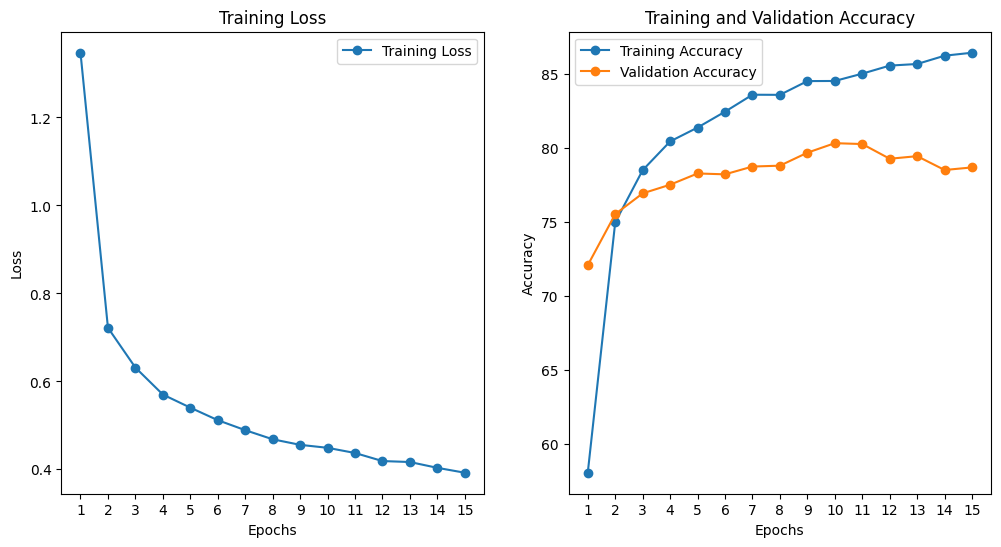

==> Evaluating on Training Set...
Confusion Matrix: 
[[ 721   11    8   57   16   20   17    2    0    0    0    0    0    0]
 [  14 2049    1   24    2    4   86    1    0    0    0    0    0    0]
 [   9    5  922   31   21   10   33   54    0    0    0    0    0    0]
 [  97   19   22 1560   20  128  177    3    0    0    0    0    0    0]
 [  32    0   36   32  715   15   14    5    0    0    0    0    0    0]
 [  28    2    5  166    6  751   33    2    0    0    0    0    0    0]
 [   3   15    5   24    3    5 2273    2    0    0    0    0    0    0]
 [   0    2   10    4    0    0    2 1619    1    1    1    1    1    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import medmnist
import timm
from medmnist import BloodMNIST, INFO
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix

# Set random seed
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

# Dataset information
data_flag = 'bloodmnist'
info = INFO[data_flag]
n_classes = len(info['label'])
classes = info['label']
BloodMNIST = getattr(medmnist, info['python_class'])
print(classes)

# Preprocessing
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# Load datasets
train_dataset = BloodMNIST(split="train", download=True, transform=data_transform)
val_dataset = BloodMNIST(split="val", download=True, transform=data_transform)
test_dataset = BloodMNIST(split='test', transform=data_transform, download=True)

# Data loaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Custom Model
class CustomEfficientModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomEfficientModel, self).__init__()
        self.Efficient = timm.create_model('efficientnet_b3', pretrained=True)
        # Freeze all layers in the network
        for param in self.Efficient.parameters():
            param.requires_grad = False

        # Unfreeze the last few layers. The exact layers to unfreeze depend on the model architecture.
        for param in self.Efficient.classifier.parameters():
            param.requires_grad = True

        # modify the classifier (head):
        num_features = self.Efficient.classifier.in_features
        self.classifier = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.Efficient(x)

# Initialize model
model = CustomEfficientModel(num_classes=n_classes)

# Set device to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Directories for saving outputs
os.makedirs("models", exist_ok=True)

# Implement early stopping mechanism
early_stopping_patience = 5
no_improvement_epochs = 0
best_val_accuracy = 0

# Evaluation Function (Corrected)
def evaluate_model(loader):
    model.eval()
    total_correct = 0
    total = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.squeeze()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Find the unique classes present in y_true
    unique_classes = list(set(y_true))

    print(f'Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}')

    # Use the 'labels' parameter to specify unique_classes
    print(f'Classification Report: \n{classification_report(y_true, y_pred, labels=unique_classes, target_names=info["label"])}')
    print(total_correct)
    print(total)
    accuracy = 100 * total_correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy, y_true, y_pred


NUM_EPOCHS = 35

# Training and Validation Metrics
train_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(NUM_EPOCHS):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        labels = labels.squeeze().long()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Compute training metrics
    epoch_loss = train_loss / len(train_loader)
    epoch_accuracy = 100 * train_correct / train_total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}: Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.2f}%')
    # Evaluate on validation set (instead of test set)
    val_accuracy, _, _ = evaluate_model(val_loader)
    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}: Validation Accuracy: {val_accuracy}')
    test_accuracies.append(val_accuracy)

    # Check for early stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_epochs = 0
        # Save the best model
        best_model_state_dict = model.state_dict()
    else:
        no_improvement_epochs += 1
        if no_improvement_epochs >= early_stopping_patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break

# Save the best model
best_model_filename = f"models/{data_flag}_best_model.pt"
torch.save(best_model_state_dict, best_model_filename)

# Plotting with dots at each epoch
plt.figure(figsize=(12, 6))

# Plot for Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xticks(range(1, len(train_losses) + 1))  # Ensure x-axis ticks match the number of epochs
plt.legend()

# Plot for Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', linestyle='-', marker='o')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Validation Accuracy', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks(range(1, max(len(train_accuracies), len(test_accuracies)) + 1))  # Ensure x-axis ticks match the number of epochs
plt.legend()

plt.show()

unique_classes = list(set(y_true))

# Evaluate on training and test sets
print('==> Evaluating on Training Set...')
train_accuracy, y_true, y_pred = evaluate_model(train_loader)
print(f'Training Set Accuracy: {train_accuracy:.2f}%')
print("Classification Report:")
print(classification_report(y_true, y_pred, labels=unique_classes, target_names=classes))

print('==> Evaluating on Test Set...')
test_accuracy, y_true, y_pred = evaluate_model(test_loader)
print(f'Test Set Accuracy: {test_accuracy:.2f}%')
print("Classification Report:")
print(classification_report(y_true, y_pred, labels=unique_classes, target_names=classes))


MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/
{'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


100%|██████████| 374/374 [00:21<00:00, 17.47it/s]


Epoch 1/35: Training Loss: 1.1476, Training Accuracy: 67.49%
Confusion Matrix: 
[[ 81   3   4  16  10   6   2   0   0]
 [  1 282   3  10   0   3  12   1   0]
 [  2   1 118  10   6   1   8   8   1]
 [ 14   8  13 201   8  31  13   2   0]
 [  3   2   6  13  94   3   1   0   0]
 [  3   2   1  41   0  95   1   0   0]
 [  2  14   4   5   0   5 296   7   0]
 [  0   0   1   0   0   0   1 233   0]
 [  0   0   0   0   0   0   0   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       122
           1       0.90      0.90      0.90       312
           2       0.79      0.76      0.77       155
           3       0.68      0.69      0.69       290
           4       0.80      0.77      0.78       122
           5       0.66      0.66      0.66       143
           6       0.89      0.89      0.89       333
           7       0.93      0.99      0.96       235

   micro avg       0.82      0.82      0.82      1712
  

100%|██████████| 374/374 [00:21<00:00, 17.64it/s]


Epoch 2/35: Training Loss: 0.5328, Training Accuracy: 82.62%
Confusion Matrix: 
[[ 85   3   2  17  10   4   1   0]
 [  0 284   2  11   0   3  12   0]
 [  2   1 122  10   6   0   8   6]
 [ 12   3   7 228   9  16  13   2]
 [  4   3   5  11  98   1   0   0]
 [  3   1   1  56   0  81   1   0]
 [  2   6   1   8   0   3 310   3]
 [  0   1   2   0   0   0   2 230]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       122
           1       0.94      0.91      0.93       312
           2       0.86      0.79      0.82       155
           3       0.67      0.79      0.72       290
           4       0.80      0.80      0.80       122
           5       0.75      0.57      0.65       143
           6       0.89      0.93      0.91       333
           7       0.95      0.98      0.97       235

    accuracy                           0.84      1712
   macro avg       0.83      0.81      0.82      1712
weighted avg       

100%|██████████| 374/374 [00:21<00:00, 17.47it/s]


Epoch 3/35: Training Loss: 0.4559, Training Accuracy: 85.00%
Confusion Matrix: 
[[ 92   3   2  14   8   2   1   0]
 [  0 288   2  10   0   3   9   0]
 [  2   0 128   9   5   0   6   5]
 [ 10   3   7 225   8  23  12   2]
 [  3   1   4   8 105   1   0   0]
 [  2   1   1  38   0 101   0   0]
 [  3   4   1   5   1   3 314   2]
 [  0   0   1   0   0   0   2 232]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       122
           1       0.96      0.92      0.94       312
           2       0.88      0.83      0.85       155
           3       0.73      0.78      0.75       290
           4       0.83      0.86      0.84       122
           5       0.76      0.71      0.73       143
           6       0.91      0.94      0.93       333
           7       0.96      0.99      0.97       235

    accuracy                           0.87      1712
   macro avg       0.86      0.85      0.85      1712
weighted avg       

100%|██████████| 374/374 [00:21<00:00, 17.60it/s]


Epoch 4/35: Training Loss: 0.4088, Training Accuracy: 86.51%
Confusion Matrix: 
[[ 92   3   1  17   7   1   1   0   0]
 [  1 287   2   9   0   3  10   0   0]
 [  1   1 126  10   3   0  10   4   0]
 [  9   3   4 236   5  15  17   1   0]
 [  4   1   4  14  97   1   1   0   0]
 [  1   1   1  46   0  90   4   0   0]
 [  1   5   0   3   0   3 318   2   1]
 [  0   0   1   0   0   0   2 232   0]
 [  0   0   0   0   0   0   0   0   0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.75      0.80       122
           1       0.95      0.92      0.94       312
           2       0.91      0.81      0.86       155
           3       0.70      0.81      0.76       290
           4       0.87      0.80      0.83       122
           5       0.80      0.63      0.70       143
           6       0.88      0.95      0.91       333
           7       0.97      0.99      0.98       235

   micro avg       0.86      0.86      0.86      1712
  

100%|██████████| 374/374 [00:21<00:00, 17.43it/s]


Epoch 5/35: Training Loss: 0.3781, Training Accuracy: 87.19%
Confusion Matrix: 
[[ 86   3   0  18  12   2   1   0]
 [  0 292   1   8   0   3   8   0]
 [  0   1 128  10   5   1   7   3]
 [  9   3   7 232   9  19  10   1]
 [  3   2   4   8 104   1   0   0]
 [  0   1   1  38   0 102   1   0]
 [  1   6   2   6   1   3 313   1]
 [  0   0   1   0   0   0   2 232]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       122
           1       0.95      0.94      0.94       312
           2       0.89      0.83      0.86       155
           3       0.72      0.80      0.76       290
           4       0.79      0.85      0.82       122
           5       0.78      0.71      0.74       143
           6       0.92      0.94      0.93       333
           7       0.98      0.99      0.98       235

    accuracy                           0.87      1712
   macro avg       0.86      0.84      0.85      1712
weighted avg       

100%|██████████| 374/374 [00:21<00:00, 17.66it/s]


Epoch 6/35: Training Loss: 0.3524, Training Accuracy: 88.13%
Confusion Matrix: 
[[ 93   3   1  17   7   0   1   0]
 [  2 292   0  10   0   2   6   0]
 [  2   0 127  10   4   0   8   4]
 [ 14   3   3 236   6  13  14   1]
 [  5   1   2  12 101   1   0   0]
 [  4   2   1  46   0  90   0   0]
 [  4   4   1   7   0   3 314   0]
 [  0   0   1   0   0   0   3 231]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       122
           1       0.96      0.94      0.95       312
           2       0.93      0.82      0.87       155
           3       0.70      0.81      0.75       290
           4       0.86      0.83      0.84       122
           5       0.83      0.63      0.71       143
           6       0.91      0.94      0.92       333
           7       0.98      0.98      0.98       235

    accuracy                           0.87      1712
   macro avg       0.86      0.84      0.85      1712
weighted avg       

100%|██████████| 374/374 [00:21<00:00, 17.60it/s]


Epoch 7/35: Training Loss: 0.3341, Training Accuracy: 88.97%
Confusion Matrix: 
[[ 93   2   1  16   7   2   1   0]
 [  1 288   2   9   0   3   9   0]
 [  1   0 124  11   2   2   8   7]
 [ 12   3   2 233   3  24  11   2]
 [  6   1   2  14  97   2   0   0]
 [  0   1   1  33   0 107   1   0]
 [  3   4   3   7   0   4 309   3]
 [  0   0   1   0   0   0   1 233]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       122
           1       0.96      0.92      0.94       312
           2       0.91      0.80      0.85       155
           3       0.72      0.80      0.76       290
           4       0.89      0.80      0.84       122
           5       0.74      0.75      0.75       143
           6       0.91      0.93      0.92       333
           7       0.95      0.99      0.97       235

    accuracy                           0.87      1712
   macro avg       0.86      0.84      0.85      1712
weighted avg       

100%|██████████| 374/374 [00:21<00:00, 17.66it/s]


Epoch 8/35: Training Loss: 0.3213, Training Accuracy: 89.08%
Confusion Matrix: 
[[ 92   3   1  14   8   2   2   0]
 [  1 290   2   7   0   3   9   0]
 [  0   0 134   6   2   3   7   3]
 [ 13   4  13 205  10  34  10   1]
 [  4   1   4   5 107   1   0   0]
 [  2   2   1  28   0 110   0   0]
 [  2   4   6   6   1   3 309   2]
 [  0   0   2   0   0   0   2 231]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       122
           1       0.95      0.93      0.94       312
           2       0.82      0.86      0.84       155
           3       0.76      0.71      0.73       290
           4       0.84      0.88      0.86       122
           5       0.71      0.77      0.74       143
           6       0.91      0.93      0.92       333
           7       0.97      0.98      0.98       235

    accuracy                           0.86      1712
   macro avg       0.85      0.85      0.85      1712
weighted avg       

100%|██████████| 374/374 [00:21<00:00, 17.60it/s]


Epoch 9/35: Training Loss: 0.3093, Training Accuracy: 89.20%
Confusion Matrix: 
[[ 94   2   1  13   9   2   1   0]
 [  2 288   1  10   0   3   8   0]
 [  1   1 129   9   5   1   7   2]
 [ 11   3   3 233  11  18  10   1]
 [  3   0   2   7 109   1   0   0]
 [  2   1   1  34   0 105   0   0]
 [  4   3   6   7   0   2 309   2]
 [  0   0   1   0   0   0   3 231]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       122
           1       0.97      0.92      0.94       312
           2       0.90      0.83      0.86       155
           3       0.74      0.80      0.77       290
           4       0.81      0.89      0.85       122
           5       0.80      0.73      0.76       143
           6       0.91      0.93      0.92       333
           7       0.98      0.98      0.98       235

    accuracy                           0.88      1712
   macro avg       0.86      0.86      0.86      1712
weighted avg       

100%|██████████| 374/374 [00:21<00:00, 17.38it/s]


Epoch 10/35: Training Loss: 0.2964, Training Accuracy: 90.05%
Confusion Matrix: 
[[ 94   3   1  13   7   2   2   0]
 [  1 293   0   7   0   3   8   0]
 [  0   1 129   9   2   2   8   4]
 [ 10   3   2 233   6  22  12   2]
 [  5   1   1  13 100   1   1   0]
 [  1   2   1  34   0 102   3   0]
 [  3   4   1   7   0   3 315   0]
 [  0   0   1   0   0   0   4 230]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       122
           1       0.95      0.94      0.95       312
           2       0.95      0.83      0.89       155
           3       0.74      0.80      0.77       290
           4       0.87      0.82      0.84       122
           5       0.76      0.71      0.73       143
           6       0.89      0.95      0.92       333
           7       0.97      0.98      0.98       235

    accuracy                           0.87      1712
   macro avg       0.87      0.85      0.86      1712
weighted avg      

100%|██████████| 374/374 [00:21<00:00, 17.75it/s]


Epoch 11/35: Training Loss: 0.2876, Training Accuracy: 90.31%
Confusion Matrix: 
[[ 97   2   0  13   8   1   1   0]
 [  1 296   0   6   0   2   7   0]
 [  1   1 130   8   2   1   9   3]
 [ 14   3   6 228   6  19  12   2]
 [  4   1   2  11 103   1   0   0]
 [  1   3   1  30   0 106   2   0]
 [  4   4   3   7   0   2 313   0]
 [  0   0   1   0   0   0   3 231]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       122
           1       0.95      0.95      0.95       312
           2       0.91      0.84      0.87       155
           3       0.75      0.79      0.77       290
           4       0.87      0.84      0.85       122
           5       0.80      0.74      0.77       143
           6       0.90      0.94      0.92       333
           7       0.98      0.98      0.98       235

    accuracy                           0.88      1712
   macro avg       0.87      0.86      0.86      1712
weighted avg      

100%|██████████| 374/374 [00:22<00:00, 16.72it/s]


Epoch 12/35: Training Loss: 0.2831, Training Accuracy: 90.39%
Confusion Matrix: 
[[ 96   3   1  11   7   2   2   0]
 [  1 297   0   5   0   2   7   0]
 [  0   1 131   7   2   3   8   3]
 [ 12   7   8 215   6  28  12   2]
 [  5   1   3  11  99   2   1   0]
 [  0   4   1  28   0 107   3   0]
 [  3   5   2   3   0   2 318   0]
 [  0   0   2   0   0   0   3 230]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       122
           1       0.93      0.95      0.94       312
           2       0.89      0.85      0.86       155
           3       0.77      0.74      0.75       290
           4       0.87      0.81      0.84       122
           5       0.73      0.75      0.74       143
           6       0.90      0.95      0.93       333
           7       0.98      0.98      0.98       235

    accuracy                           0.87      1712
   macro avg       0.86      0.85      0.86      1712
weighted avg      

100%|██████████| 374/374 [00:21<00:00, 17.24it/s]


Epoch 13/35: Training Loss: 0.2657, Training Accuracy: 91.04%
Confusion Matrix: 
[[ 93   2   1  15   7   2   2   0]
 [  1 293   1   7   0   3   7   0]
 [  0   1 128   8   3   3   5   7]
 [  8   3   6 229   7  24  11   2]
 [  4   1   3  11 102   1   0   0]
 [  1   2   1  32   0 106   1   0]
 [  2   4   3   8   1   3 310   2]
 [  0   0   1   0   0   0   1 233]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       122
           1       0.96      0.94      0.95       312
           2       0.89      0.83      0.86       155
           3       0.74      0.79      0.76       290
           4       0.85      0.84      0.84       122
           5       0.75      0.74      0.74       143
           6       0.92      0.93      0.93       333
           7       0.95      0.99      0.97       235

    accuracy                           0.87      1712
   macro avg       0.86      0.85      0.86      1712
weighted avg      

100%|██████████| 374/374 [00:21<00:00, 17.56it/s]


Epoch 14/35: Training Loss: 0.2580, Training Accuracy: 91.09%
Confusion Matrix: 
[[ 94   2   1  15   7   2   1   0]
 [  1 295   1   6   0   2   7   0]
 [  0   1 133   9   2   1   6   3]
 [ 11   4   9 227   7  19  12   1]
 [  4   1   5  11  99   1   1   0]
 [  1   3   1  34   0 103   1   0]
 [  2   4   7   7   1   1 311   0]
 [  0   0   2   0   0   0   3 230]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       122
           1       0.95      0.95      0.95       312
           2       0.84      0.86      0.85       155
           3       0.73      0.78      0.76       290
           4       0.85      0.81      0.83       122
           5       0.80      0.72      0.76       143
           6       0.91      0.93      0.92       333
           7       0.98      0.98      0.98       235

    accuracy                           0.87      1712
   macro avg       0.86      0.85      0.86      1712
weighted avg      

100%|██████████| 374/374 [00:22<00:00, 16.77it/s]


Epoch 15/35: Training Loss: 0.2565, Training Accuracy: 91.25%
Confusion Matrix: 
[[ 94   3   1  13   7   2   2   0]
 [  1 293   0   6   0   2  10   0]
 [  0   1 127   7   2   3  11   4]
 [ 11   4   4 230   5  20  14   2]
 [  4   1   3  12 100   1   1   0]
 [  1   1   1  29   0 108   3   0]
 [  2   3   2   7   0   2 315   2]
 [  0   0   2   0   0   0   2 231]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       122
           1       0.96      0.94      0.95       312
           2       0.91      0.82      0.86       155
           3       0.76      0.79      0.77       290
           4       0.88      0.82      0.85       122
           5       0.78      0.76      0.77       143
           6       0.88      0.95      0.91       333
           7       0.97      0.98      0.97       235

    accuracy                           0.88      1712
   macro avg       0.87      0.85      0.86      1712
weighted avg      

100%|██████████| 374/374 [00:21<00:00, 17.49it/s]


Epoch 16/35: Training Loss: 0.2476, Training Accuracy: 91.50%
Confusion Matrix: 
[[ 94   3   0  13   8   2   2   0]
 [  1 295   1   5   0   3   7   0]
 [  0   1 131   7   3   2   8   3]
 [ 12   4   7 221   7  23  14   2]
 [  4   1   4   9 103   1   0   0]
 [  1   1   1  27   0 111   2   0]
 [  3   1   4   6   1   2 315   1]
 [  0   0   2   0   0   0   2 231]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       122
           1       0.96      0.95      0.95       312
           2       0.87      0.85      0.86       155
           3       0.77      0.76      0.76       290
           4       0.84      0.84      0.84       122
           5       0.77      0.78      0.77       143
           6       0.90      0.95      0.92       333
           7       0.97      0.98      0.98       235

    accuracy                           0.88      1712
   macro avg       0.86      0.86      0.86      1712
weighted avg      

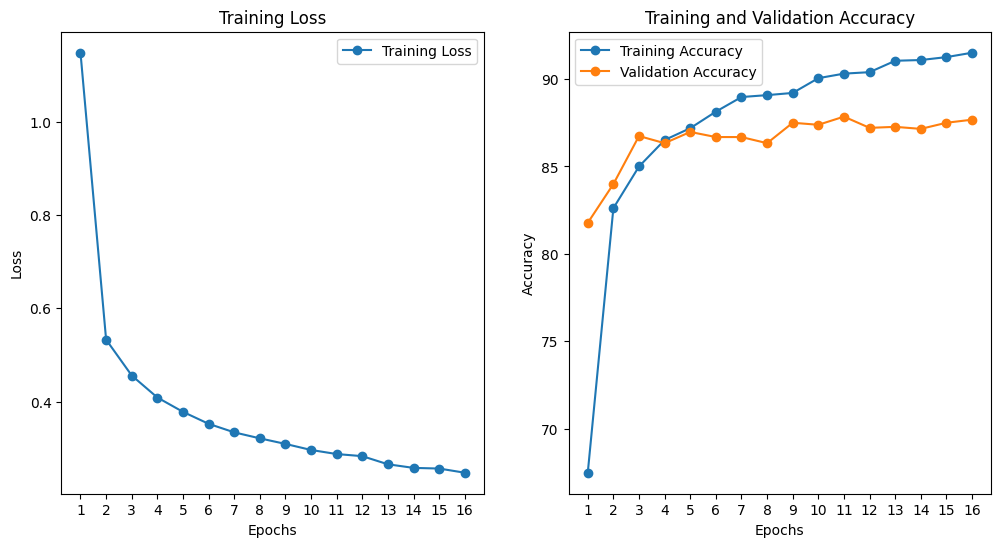

==> Evaluating on Training Set...
Confusion Matrix: 
[[ 768    4    3   45   20    8    4    0]
 [   4 2135    3   17    3    2   16    1]
 [  10    0 1025   15   12    4   13    6]
 [  45    6   15 1773   24  113   47    3]
 [   9    0    6   18  806   10    0    0]
 [  15    0    2  116    7  842   11    0]
 [   8   12    4   39    2    5 2259    1]
 [   0    0    0    0    0    0    0 1643]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       852
           1       0.99      0.98      0.98      2181
           2       0.97      0.94      0.96      1085
           3       0.88      0.88      0.88      2026
           4       0.92      0.95      0.94       849
           5       0.86      0.85      0.85       993
           6       0.96      0.97      0.97      2330
           7       0.99      1.00      1.00      1643

    accuracy                           0.94     11959
   macro avg       0.93      0.93   

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import medmnist
import timm
from medmnist import BloodMNIST, INFO
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix

# Set random seed
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

# Dataset information
data_flag = 'bloodmnist'
info = INFO[data_flag]
n_classes = len(info['label'])
classes = info['label']
BloodMNIST = getattr(medmnist, info['python_class'])
print(classes)

# Preprocessing
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# Load datasets
train_dataset = BloodMNIST(split="train", download=True, transform=data_transform)
val_dataset = BloodMNIST(split="val", download=True, transform=data_transform)
test_dataset = BloodMNIST(split='test', transform=data_transform, download=True)

# Data loaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Custom Model
class CustomEfficientb0Model(nn.Module):
    def __init__(self, num_classes):
        super(CustomEfficientb0Model, self).__init__()
        self.Efficient = timm.create_model('efficientnet_b0', pretrained=True)
        # Freeze all layers in the network
        for param in self.Efficient.parameters():
            param.requires_grad = False

        # Unfreeze the last few layers. The exact layers to unfreeze depend on the model architecture.
        for param in self.Efficient.classifier.parameters():
            param.requires_grad = True

        # modify the classifier (head):
        num_features = self.Efficient.classifier.in_features
        self.classifier = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.Efficient(x)

# Initialize model
model = CustomEfficientb0Model(num_classes=n_classes)

# Set device to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Directories for saving outputs
os.makedirs("models", exist_ok=True)

# Implement early stopping mechanism
early_stopping_patience = 5
no_improvement_epochs = 0
best_val_accuracy = 0

# Evaluation Function (Corrected)
def evaluate_model(loader):
    model.eval()
    total_correct = 0
    total = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.squeeze()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Find the unique classes present in y_true
    unique_classes = list(set(y_true))

    print(f'Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}')

    # Use the 'labels' parameter to specify unique_classes
    print(f'Classification Report: \n{classification_report(y_true, y_pred, labels=unique_classes, target_names=info["label"])}')
    print(total_correct)
    print(total)
    accuracy = 100 * total_correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy, y_true, y_pred


NUM_EPOCHS = 35

# Training and Validation Metrics
train_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(NUM_EPOCHS):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        labels = labels.squeeze().long()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Compute training metrics
    epoch_loss = train_loss / len(train_loader)
    epoch_accuracy = 100 * train_correct / train_total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}: Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.2f}%')
    # Evaluate on validation set (instead of test set)
    val_accuracy, _, _ = evaluate_model(val_loader)
    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}: Validation Accuracy: {val_accuracy}')
    test_accuracies.append(val_accuracy)

    # Check for early stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_epochs = 0
        # Save the best model
        best_model_state_dict = model.state_dict()
    else:
        no_improvement_epochs += 1
        if no_improvement_epochs >= early_stopping_patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break

# Save the best model
best_model_filename = f"models/{data_flag}_best_model.pt"
torch.save(best_model_state_dict, best_model_filename)

# Plotting with dots at each epoch
plt.figure(figsize=(12, 6))

# Plot for Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xticks(range(1, len(train_losses) + 1))  # Ensure x-axis ticks match the number of epochs
plt.legend()

# Plot for Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', linestyle='-', marker='o')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Validation Accuracy', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks(range(1, max(len(train_accuracies), len(test_accuracies)) + 1))  # Ensure x-axis ticks match the number of epochs
plt.legend()

plt.show()

unique_classes = list(set(y_true))

# Evaluate on training and test sets
print('==> Evaluating on Training Set...')
train_accuracy, y_true, y_pred = evaluate_model(train_loader)
print(f'Training Set Accuracy: {train_accuracy:.2f}%')
print("Classification Report:")
print(classification_report(y_true, y_pred, labels=unique_classes, target_names=classes))

print('==> Evaluating on Test Set...')
test_accuracy, y_true, y_pred = evaluate_model(test_loader)
print(f'Test Set Accuracy: {test_accuracy:.2f}%')
print("Classification Report:")
print(classification_report(y_true, y_pred, labels=unique_classes, target_names=classes))


MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


100%|██████████| 374/374 [01:21<00:00,  4.56it/s]


Epoch 1/35: Training Loss: 0.3305, Training Accuracy: 88.99%
Confusion Matrix: 
[[115   1   0   3   0   1   2   0]
 [  0 309   0   0   0   0   3   0]
 [  0   0 146   5   0   0   0   4]
 [ 15   0   1 256   1   9   6   2]
 [ 13   0   0   5 100   4   0   0]
 [  1   0   0  14   0 128   0   0]
 [  0   0   0   3   0   1 329   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       122
           1       1.00      0.99      0.99       312
           2       0.99      0.94      0.97       155
           3       0.90      0.88      0.89       290
           4       0.99      0.82      0.90       122
           5       0.90      0.90      0.90       143
           6       0.97      0.99      0.98       333
           7       0.98      1.00      0.99       235

    accuracy                           0.95      1712
   macro avg       0.94      0.93      0.93      1712
weighted avg       

100%|██████████| 374/374 [01:21<00:00,  4.57it/s]


Epoch 2/35: Training Loss: 0.1614, Training Accuracy: 94.41%
Confusion Matrix: 
[[115   0   0   4   0   3   0   0]
 [  1 306   0   0   0   1   2   2]
 [  0   0 131   8  11   1   4   0]
 [  9   0   0 251   3  17  10   0]
 [  1   0   0   0 119   2   0   0]
 [  0   0   0   4   0 139   0   0]
 [  0   0   0   4   0   2 325   2]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       122
           1       1.00      0.98      0.99       312
           2       1.00      0.85      0.92       155
           3       0.93      0.87      0.89       290
           4       0.89      0.98      0.93       122
           5       0.84      0.97      0.90       143
           6       0.95      0.98      0.96       333
           7       0.98      1.00      0.99       235

    accuracy                           0.95      1712
   macro avg       0.94      0.94      0.94      1712
weighted avg       

100%|██████████| 374/374 [01:21<00:00,  4.58it/s]


Epoch 3/35: Training Loss: 0.1169, Training Accuracy: 95.92%
Confusion Matrix: 
[[ 94   0   0  19   6   3   0   0]
 [  0 306   0   1   0   0   5   0]
 [  0   0 151   4   0   0   0   0]
 [  0   0   6 271   3   5   5   0]
 [  0   0   1   0 121   0   0   0]
 [  0   0   0  15   0 128   0   0]
 [  0   0   0   5   0   1 327   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       122
           1       1.00      0.98      0.99       312
           2       0.96      0.97      0.96       155
           3       0.86      0.93      0.90       290
           4       0.93      0.99      0.96       122
           5       0.93      0.90      0.91       143
           6       0.97      0.98      0.98       333
           7       1.00      1.00      1.00       235

    accuracy                           0.95      1712
   macro avg       0.96      0.94      0.95      1712
weighted avg       

100%|██████████| 374/374 [01:21<00:00,  4.58it/s]


Epoch 4/35: Training Loss: 0.0931, Training Accuracy: 96.86%
Confusion Matrix: 
[[109   0   0   6   6   1   0   0]
 [  0 312   0   0   0   0   0   0]
 [  0   0 151   1   3   0   0   0]
 [  1   1   6 245   7  17  13   0]
 [  0   0   2   0 119   0   0   1]
 [  0   0   0   3   3 137   0   0]
 [  0   0   1   3   0   1 328   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       122
           1       1.00      1.00      1.00       312
           2       0.94      0.97      0.96       155
           3       0.95      0.84      0.89       290
           4       0.86      0.98      0.92       122
           5       0.88      0.96      0.92       143
           6       0.96      0.98      0.97       333
           7       1.00      1.00      1.00       235

    accuracy                           0.96      1712
   macro avg       0.95      0.95      0.95      1712
weighted avg       

100%|██████████| 374/374 [01:21<00:00,  4.59it/s]


Epoch 5/35: Training Loss: 0.0756, Training Accuracy: 97.42%
Confusion Matrix: 
[[119   0   0   1   0   2   0   0]
 [  1 310   0   0   0   0   1   0]
 [  0   0 154   0   0   0   1   0]
 [ 11   0   6 245   4  24   0   0]
 [  0   0   1   2 116   3   0   0]
 [  0   0   0   3   0 140   0   0]
 [  0   0   0  17   0   1 315   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       122
           1       1.00      0.99      1.00       312
           2       0.96      0.99      0.97       155
           3       0.91      0.84      0.88       290
           4       0.97      0.95      0.96       122
           5       0.82      0.98      0.89       143
           6       0.99      0.95      0.97       333
           7       1.00      1.00      1.00       235

    accuracy                           0.95      1712
   macro avg       0.95      0.96      0.95      1712
weighted avg       

100%|██████████| 374/374 [01:21<00:00,  4.59it/s]


Epoch 6/35: Training Loss: 0.0845, Training Accuracy: 97.14%
Confusion Matrix: 
[[112   6   0   1   1   2   0   0]
 [  0 312   0   0   0   0   0   0]
 [  1   0 150   2   2   0   0   0]
 [  4   3  10 251   3  16   3   0]
 [  0   0   0   0 122   0   0   0]
 [  0   2   0   7   0 134   0   0]
 [  0   3   1   8   0   1 320   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       122
           1       0.96      1.00      0.98       312
           2       0.93      0.97      0.95       155
           3       0.93      0.87      0.90       290
           4       0.95      1.00      0.98       122
           5       0.88      0.94      0.91       143
           6       0.99      0.96      0.98       333
           7       1.00      1.00      1.00       235

    accuracy                           0.96      1712
   macro avg       0.95      0.96      0.95      1712
weighted avg       

100%|██████████| 374/374 [01:21<00:00,  4.60it/s]


Epoch 7/35: Training Loss: 0.0672, Training Accuracy: 97.76%
Confusion Matrix: 
[[116   1   0   2   1   0   2   0]
 [  0 309   0   0   0   0   3   0]
 [  0   0 155   0   0   0   0   0]
 [  7   0  21 232   3  10  17   0]
 [  2   0   0   1 118   1   0   0]
 [  1   0   3   7   1 130   1   0]
 [  0   0   0   0   0   1 332   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       122
           1       1.00      0.99      0.99       312
           2       0.87      1.00      0.93       155
           3       0.96      0.80      0.87       290
           4       0.96      0.97      0.96       122
           5       0.92      0.91      0.91       143
           6       0.94      1.00      0.97       333
           7       1.00      1.00      1.00       235

    accuracy                           0.95      1712
   macro avg       0.94      0.95      0.95      1712
weighted avg       

100%|██████████| 374/374 [01:21<00:00,  4.60it/s]


Epoch 8/35: Training Loss: 0.0465, Training Accuracy: 98.36%
Confusion Matrix: 
[[111   3   0   6   1   1   0   0]
 [  0 311   0   0   0   0   1   0]
 [  0   0 146   8   0   0   0   1]
 [  4   1   0 265   2   6  11   1]
 [  0   0   0   4 117   1   0   0]
 [  0   0   0   8   0 135   0   0]
 [  0   1   0   5   0   1 326   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       122
           1       0.98      1.00      0.99       312
           2       1.00      0.94      0.97       155
           3       0.90      0.91      0.90       290
           4       0.97      0.96      0.97       122
           5       0.94      0.94      0.94       143
           6       0.96      0.98      0.97       333
           7       0.99      1.00      1.00       235

    accuracy                           0.96      1712
   macro avg       0.96      0.96      0.96      1712
weighted avg       

100%|██████████| 374/374 [01:21<00:00,  4.59it/s]


Epoch 9/35: Training Loss: 0.0508, Training Accuracy: 98.25%
Confusion Matrix: 
[[116   0   0   5   1   0   0   0]
 [  0 312   0   0   0   0   0   0]
 [  0   0 154   1   0   0   0   0]
 [  1   0   7 255   5  13   9   0]
 [  0   0   2   2 118   0   0   0]
 [  0   0   0   2   0 141   0   0]
 [  0   0   1   2   0   1 329   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       122
           1       1.00      1.00      1.00       312
           2       0.94      0.99      0.97       155
           3       0.96      0.88      0.92       290
           4       0.95      0.97      0.96       122
           5       0.91      0.99      0.95       143
           6       0.97      0.99      0.98       333
           7       1.00      1.00      1.00       235

    accuracy                           0.97      1712
   macro avg       0.97      0.97      0.97      1712
weighted avg       

100%|██████████| 374/374 [01:21<00:00,  4.59it/s]


Epoch 10/35: Training Loss: 0.0480, Training Accuracy: 98.32%
Confusion Matrix: 
[[105   0   0  15   0   2   0   0]
 [  1 310   0   1   0   0   0   0]
 [  0   0 150   5   0   0   0   0]
 [  1   0   3 275   2   5   4   0]
 [  2   0   0   3 115   2   0   0]
 [  0   0   0   9   0 134   0   0]
 [  0   0   0   7   0   1 325   0]
 [  0   0   1   0   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       122
           1       1.00      0.99      1.00       312
           2       0.97      0.97      0.97       155
           3       0.87      0.95      0.91       290
           4       0.98      0.94      0.96       122
           5       0.93      0.94      0.93       143
           6       0.99      0.98      0.98       333
           7       1.00      1.00      1.00       235

    accuracy                           0.96      1712
   macro avg       0.96      0.95      0.96      1712
weighted avg      

100%|██████████| 374/374 [01:21<00:00,  4.61it/s]


Epoch 11/35: Training Loss: 0.0446, Training Accuracy: 98.46%
Confusion Matrix: 
[[117   0   1   2   2   0   0   0]
 [  2 310   0   0   0   0   0   0]
 [  0   0 154   0   0   0   1   0]
 [  3   2   5 258   3   4  15   0]
 [  0   0   1   0 120   1   0   0]
 [  0   0   1   9   0 133   0   0]
 [  1   0   0   1   0   1 330   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       122
           1       0.99      0.99      0.99       312
           2       0.95      0.99      0.97       155
           3       0.96      0.89      0.92       290
           4       0.96      0.98      0.97       122
           5       0.96      0.93      0.94       143
           6       0.95      0.99      0.97       333
           7       1.00      1.00      1.00       235

    accuracy                           0.97      1712
   macro avg       0.97      0.97      0.97      1712
weighted avg      

100%|██████████| 374/374 [01:21<00:00,  4.60it/s]


Epoch 12/35: Training Loss: 0.0514, Training Accuracy: 98.15%
Confusion Matrix: 
[[119   0   0   2   0   1   0   0]
 [  0 311   0   0   0   0   1   0]
 [  0   0 152   0   1   0   0   2]
 [  9   1  18 227   4  21  10   0]
 [  2   0   1   0 118   1   0   0]
 [  0   0   0   1   0 142   0   0]
 [  0   0   0   3   0   2 328   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       122
           1       1.00      1.00      1.00       312
           2       0.89      0.98      0.93       155
           3       0.97      0.78      0.87       290
           4       0.96      0.97      0.96       122
           5       0.85      0.99      0.92       143
           6       0.97      0.98      0.98       333
           7       0.99      1.00      1.00       235

    accuracy                           0.95      1712
   macro avg       0.94      0.96      0.95      1712
weighted avg      

100%|██████████| 374/374 [01:20<00:00,  4.62it/s]


Epoch 13/35: Training Loss: 0.0384, Training Accuracy: 98.72%
Confusion Matrix: 
[[111   1   0   2   4   4   0   0]
 [  1 308   0   0   0   0   3   0]
 [  0   0 153   1   1   0   0   0]
 [  3   2   9 239   4  20  13   0]
 [  0   0   0   0 122   0   0   0]
 [  0   0   0   5   0 138   0   0]
 [  0   0   0   4   0   1 328   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       122
           1       0.99      0.99      0.99       312
           2       0.94      0.99      0.97       155
           3       0.95      0.82      0.88       290
           4       0.93      1.00      0.96       122
           5       0.85      0.97      0.90       143
           6       0.95      0.98      0.97       333
           7       1.00      1.00      1.00       235

    accuracy                           0.95      1712
   macro avg       0.95      0.96      0.95      1712
weighted avg      

100%|██████████| 374/374 [01:20<00:00,  4.62it/s]


Epoch 14/35: Training Loss: 0.0334, Training Accuracy: 98.86%
Confusion Matrix: 
[[117   1   0   1   2   0   1   0]
 [  0 311   0   0   0   0   1   0]
 [  0   0 150   2   2   0   1   0]
 [  8   0   1 269   4   3   5   0]
 [  1   0   0   1 120   0   0   0]
 [  0   0   0  11   0 131   1   0]
 [  0   0   0   7   0   1 325   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       122
           1       1.00      1.00      1.00       312
           2       0.99      0.97      0.98       155
           3       0.92      0.93      0.93       290
           4       0.94      0.98      0.96       122
           5       0.97      0.92      0.94       143
           6       0.97      0.98      0.97       333
           7       1.00      1.00      1.00       235

    accuracy                           0.97      1712
   macro avg       0.97      0.97      0.97      1712
weighted avg      

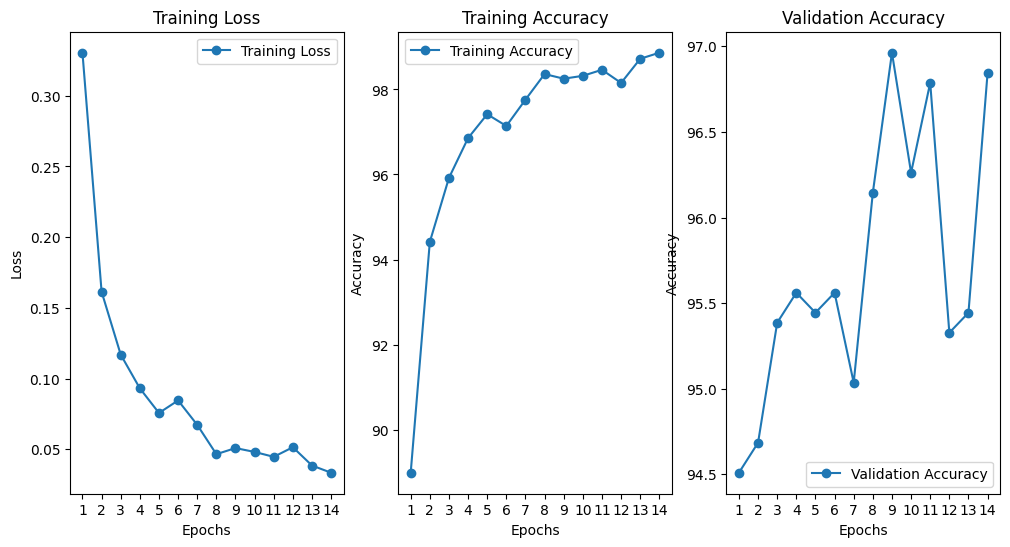

==> Evaluating on Training Set...
Confusion Matrix: 
[[ 850    0    1    0    0    0    1    0]
 [   2 2177    0    1    0    0    1    0]
 [   0    0 1074    5    6    0    0    0]
 [   6    0    0 2019    0    1    0    0]
 [   0    0    0    0  849    0    0    0]
 [   3    0    1   19    0  969    1    0]
 [   0    0    0   18    0    1 2311    0]
 [   0    0    1    0    0    0    0 1642]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       852
           1       1.00      1.00      1.00      2181
           2       1.00      0.99      0.99      1085
           3       0.98      1.00      0.99      2026
           4       0.99      1.00      1.00       849
           5       1.00      0.98      0.99       993
           6       1.00      0.99      1.00      2330
           7       1.00      1.00      1.00      1643

    accuracy                           0.99     11959
   macro avg       0.99      0.99   

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import medmnist
import timm
from medmnist import BloodMNIST, INFO
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set random seed
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

# Dataset information
data_flag = 'bloodmnist'
info = INFO[data_flag]
n_classes = len(info['label'])
classes = info['label']
BloodMNIST = getattr(medmnist, info['python_class'])

# Preprocessing
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# Load datasets
train_dataset = BloodMNIST(split="train", download=True, transform=data_transform)
val_dataset = BloodMNIST(split="val", download=True, transform=data_transform)
test_dataset = BloodMNIST(split='test', transform=data_transform, download=True)

# Data loaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Custom Hybrid Modelclass CustomHybridModel(nn.Module):
class CustomHybridModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomHybridModel, self).__init__()
        # Load the models with pretrained weights but without the final classification layers
        self.swin = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=0)
        self.efficientnet = timm.create_model('efficientnet_b0', pretrained=True, num_classes=0)

        # Adjust the classifier to combine the outputs of the last layers of both models
        swin_feature_size = self.swin.num_features
        efficientnet_feature_size = self.efficientnet.num_features

        self.classifier = nn.Linear(swin_feature_size + efficientnet_feature_size, num_classes)

    def forward(self, x):
        swin_features = self.swin(x)
        efficientnet_features = self.efficientnet(x)
        combined = torch.cat((swin_features, efficientnet_features), dim=1)
        return self.classifier(combined)

# Initialize model
model = CustomHybridModel(num_classes=n_classes)

# Set device to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Directories for saving outputs
os.makedirs("models", exist_ok=True)

# Implement early stopping mechanism
early_stopping_patience = 5
no_improvement_epochs = 0
best_val_accuracy = 0

# Evaluation Function (Corrected)
def evaluate_model(loader):
    model.eval()
    total_correct = 0
    total = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.squeeze()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    print(f'Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}')
    print(f'Classification Report: \n{classification_report(y_true, y_pred, target_names=classes)}')
    print(total_correct)
    print(total)
    accuracy = 100 * total_correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy, y_true, y_pred

NUM_EPOCHS = 35

# Training and Validation Metrics
train_losses = []
train_accuracies = []
test_accuracies = []
# Training loop
for epoch in range(NUM_EPOCHS):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        labels = labels.squeeze().long()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Compute training metrics
    epoch_loss = train_loss / len(train_loader)
    epoch_accuracy = 100 * train_correct / train_total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)


    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}: Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.2f}%')
    # Evaluate on validation set (instead of test set)
    val_accuracy, _, _ = evaluate_model(val_loader)
    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}: Validation Accuracy: {val_accuracy}')
    test_accuracies.append(val_accuracy)

    # Check for early stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_epochs = 0
        # Save the best model
        best_model_state_dict = model.state_dict()
    else:
        no_improvement_epochs += 1
        if no_improvement_epochs >= early_stopping_patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break

# Save the best model
best_model_filename = f"models/{data_flag}_best_model.pt"
torch.save(best_model_state_dict, best_model_filename)

# Plotting with dots at each epoch
plt.figure(figsize=(12, 6))

# Plot for Training Loss
plt.subplot(1, 3, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xticks(range(1, len(train_losses) + 1))  # Ensure x-axis ticks match the number of epochs
plt.legend()

# Plot for Training and Validation Accuracy
plt.subplot(1, 3, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.xticks(range(1, len(train_accuracies) + 1))  # Ensure x-axis ticks match the number of epochs
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Validation Accuracy', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.xticks(range(1, len(test_accuracies) + 1)) # Ensure x-axis ticks match the number of epochs
plt.legend()

plt.show()


# Evaluate on training and test sets
print('==> Evaluating on Training Set...')
train_accuracy, y_true, y_pred = evaluate_model(train_loader)
print(f'Training Set Accuracy: {train_accuracy:.2f}%')
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))

print('==> Evaluating on Test Set...')
test_accuracy, y_true, y_pred = evaluate_model(val_loader)
print(f'Test Set Accuracy: {test_accuracy:.2f}%')
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))

MedMNIST v3.0.1 @ https://github.com/MedMNIST/MedMNIST/
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
100%|██████████| 374/374 [04:26<00:00,  1.41it/s]


Epoch 1/35: Training Loss: 0.3398, Training Accuracy: 88.59%
Confusion Matrix: 
[[101   0   2  15   2   1   1   0]
 [  0 310   0   0   0   0   2   0]
 [  0   0 152   1   1   0   0   1]
 [  3   0  13 246   4  15   9   0]
 [  0   0   3   0 119   0   0   0]
 [  0   0   0   4   0 139   0   0]
 [  0   1   2   2   0   1 327   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       122
           1       1.00      0.99      1.00       312
           2       0.88      0.98      0.93       155
           3       0.92      0.85      0.88       290
           4       0.94      0.98      0.96       122
           5       0.89      0.97      0.93       143
           6       0.96      0.98      0.97       333
           7       1.00      1.00      1.00       235

    accuracy                           0.95      1712
   macro avg       0.95      0.95      0.95      1712
weighted avg       

100%|██████████| 374/374 [04:27<00:00,  1.40it/s]


Epoch 2/35: Training Loss: 0.1515, Training Accuracy: 94.93%
Confusion Matrix: 
[[116   0   0   0   4   2   0   0]
 [  3 308   0   0   0   1   0   0]
 [  0   0 151   2   1   0   0   1]
 [  6   0   2 216   8  45  13   0]
 [  0   0   0   0 122   0   0   0]
 [  0   0   0   1   1 141   0   0]
 [  0   2   0   2   0   3 326   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       122
           1       0.99      0.99      0.99       312
           2       0.99      0.97      0.98       155
           3       0.98      0.74      0.85       290
           4       0.90      1.00      0.95       122
           5       0.73      0.99      0.84       143
           6       0.96      0.98      0.97       333
           7       1.00      1.00      1.00       235

    accuracy                           0.94      1712
   macro avg       0.93      0.95      0.94      1712
weighted avg       

100%|██████████| 374/374 [04:27<00:00,  1.40it/s]


Epoch 3/35: Training Loss: 0.1044, Training Accuracy: 96.38%
Confusion Matrix: 
[[109   0   0   4   5   4   0   0]
 [  1 310   0   0   0   0   1   0]
 [  0   0 149   2   0   0   2   2]
 [  0   0   2 263   2  15   8   0]
 [  0   0   0   0 117   5   0   0]
 [  0   0   0  10   0 133   0   0]
 [  0   2   0   7   0   3 321   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       122
           1       0.99      0.99      0.99       312
           2       0.99      0.96      0.97       155
           3       0.92      0.91      0.91       290
           4       0.94      0.96      0.95       122
           5       0.83      0.93      0.88       143
           6       0.97      0.96      0.97       333
           7       0.99      1.00      1.00       235

    accuracy                           0.96      1712
   macro avg       0.95      0.95      0.95      1712
weighted avg       

100%|██████████| 374/374 [04:26<00:00,  1.40it/s]


Epoch 4/35: Training Loss: 0.0805, Training Accuracy: 97.06%
Confusion Matrix: 
[[113   0   0   2   4   3   0   0]
 [  8 292   0   0   0   1  11   0]
 [  0   0 144   9   0   0   1   1]
 [  8   0   2 239   2  17  22   0]
 [  0   0   3   2 116   1   0   0]
 [  0   0   0   4   0 138   1   0]
 [  0   0   0   0   0   1 332   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       122
           1       1.00      0.94      0.97       312
           2       0.97      0.93      0.95       155
           3       0.93      0.82      0.88       290
           4       0.95      0.95      0.95       122
           5       0.86      0.97      0.91       143
           6       0.90      1.00      0.95       333
           7       1.00      1.00      1.00       235

    accuracy                           0.94      1712
   macro avg       0.94      0.94      0.94      1712
weighted avg       

100%|██████████| 374/374 [04:27<00:00,  1.40it/s]


Epoch 5/35: Training Loss: 0.0770, Training Accuracy: 97.52%
Confusion Matrix: 
[[ 92   0   2  24   2   2   0   0]
 [  0 310   0   1   0   0   1   0]
 [  0   0 152   1   0   0   0   2]
 [  1   0  25 229  14  11  10   0]
 [  0   0   0   0 122   0   0   0]
 [  0   1   0   1   5 136   0   0]
 [  0   0   0   4   0   1 328   0]
 [  0   0   1   0   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.75      0.86       122
           1       1.00      0.99      1.00       312
           2       0.84      0.98      0.91       155
           3       0.88      0.79      0.83       290
           4       0.85      1.00      0.92       122
           5       0.91      0.95      0.93       143
           6       0.97      0.98      0.98       333
           7       0.99      1.00      0.99       235

    accuracy                           0.94      1712
   macro avg       0.93      0.93      0.93      1712
weighted avg       

100%|██████████| 374/374 [04:26<00:00,  1.40it/s]


Epoch 6/35: Training Loss: 0.0505, Training Accuracy: 98.15%
Confusion Matrix: 
[[111   0   0   8   2   1   0   0]
 [  0 310   0   0   0   0   2   0]
 [  0   0 149   4   0   0   1   1]
 [  1   0   4 258   8   9  10   0]
 [  0   0   0   2 120   0   0   0]
 [  0   0   0  11   1 131   0   0]
 [  0   0   0   1   0   2 330   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       122
           1       1.00      0.99      1.00       312
           2       0.97      0.96      0.97       155
           3       0.91      0.89      0.90       290
           4       0.92      0.98      0.95       122
           5       0.92      0.92      0.92       143
           6       0.96      0.99      0.98       333
           7       1.00      1.00      1.00       235

    accuracy                           0.96      1712
   macro avg       0.96      0.96      0.96      1712
weighted avg       

100%|██████████| 374/374 [04:27<00:00,  1.40it/s]


Epoch 7/35: Training Loss: 0.0610, Training Accuracy: 98.10%
Confusion Matrix: 
[[118   0   0   3   0   0   1   0]
 [  1 310   0   0   0   0   1   0]
 [  0   0 144   5   4   0   1   1]
 [  5   0   2 267   4  10   2   0]
 [  0   0   0   2 119   1   0   0]
 [  0   0   0   5   0 138   0   0]
 [  0   0   0   9   0   1 323   0]
 [  0   0   1   0   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       122
           1       1.00      0.99      1.00       312
           2       0.98      0.93      0.95       155
           3       0.92      0.92      0.92       290
           4       0.94      0.98      0.96       122
           5       0.92      0.97      0.94       143
           6       0.98      0.97      0.98       333
           7       1.00      1.00      1.00       235

    accuracy                           0.97      1712
   macro avg       0.96      0.96      0.96      1712
weighted avg       

100%|██████████| 374/374 [04:26<00:00,  1.40it/s]


Epoch 8/35: Training Loss: 0.0429, Training Accuracy: 98.52%
Confusion Matrix: 
[[121   0   0   0   1   0   0   0]
 [  1 309   0   0   0   0   2   0]
 [  0   0 150   3   1   0   1   0]
 [ 24   2   8 221   6   6  23   0]
 [  0   0   4   2 114   2   0   0]
 [  2   0   0   8   0 133   0   0]
 [  0   1   0   0   0   0 332   0]
 [  0   0   1   0   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       122
           1       0.99      0.99      0.99       312
           2       0.92      0.97      0.94       155
           3       0.94      0.76      0.84       290
           4       0.93      0.93      0.93       122
           5       0.94      0.93      0.94       143
           6       0.93      1.00      0.96       333
           7       1.00      1.00      1.00       235

    accuracy                           0.94      1712
   macro avg       0.93      0.95      0.94      1712
weighted avg       

100%|██████████| 374/374 [04:26<00:00,  1.40it/s]


Epoch 9/35: Training Loss: 0.0524, Training Accuracy: 98.34%
Confusion Matrix: 
[[120   0   0   0   0   0   2   0]
 [  0 309   0   0   0   0   3   0]
 [  0   0 153   2   0   0   0   0]
 [  6   0   1 246   1   9  27   0]
 [  1   0   1   2 117   1   0   0]
 [  0   0   0   3   0 138   2   0]
 [  0   0   0   0   0   1 332   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       122
           1       1.00      0.99      1.00       312
           2       0.99      0.99      0.99       155
           3       0.97      0.85      0.91       290
           4       0.99      0.96      0.97       122
           5       0.93      0.97      0.95       143
           6       0.91      1.00      0.95       333
           7       1.00      1.00      1.00       235

    accuracy                           0.96      1712
   macro avg       0.97      0.97      0.97      1712
weighted avg       

100%|██████████| 374/374 [04:26<00:00,  1.40it/s]


Epoch 10/35: Training Loss: 0.0321, Training Accuracy: 99.00%
Confusion Matrix: 
[[114   0   0   0   8   0   0   0]
 [  0 311   0   0   0   0   1   0]
 [  0   0 153   1   1   0   0   0]
 [ 14   0  11 234   9   4  18   0]
 [  0   0   1   0 121   0   0   0]
 [  0   0   0   6   7 129   1   0]
 [  0   0   0   1   0   1 331   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       122
           1       1.00      1.00      1.00       312
           2       0.93      0.99      0.96       155
           3       0.97      0.81      0.88       290
           4       0.83      0.99      0.90       122
           5       0.96      0.90      0.93       143
           6       0.94      0.99      0.97       333
           7       1.00      1.00      1.00       235

    accuracy                           0.95      1712
   macro avg       0.94      0.95      0.94      1712
weighted avg      

100%|██████████| 374/374 [04:26<00:00,  1.40it/s]


Epoch 11/35: Training Loss: 0.0462, Training Accuracy: 98.42%
Confusion Matrix: 
[[121   0   0   0   0   1   0   0]
 [  1 309   0   1   0   0   1   0]
 [  1   0 151   2   0   0   0   1]
 [ 13   0   4 250   2  14   7   0]
 [  1   0   1   1 119   0   0   0]
 [  0   0   0   1   0 142   0   0]
 [  0   0   0   5   0   2 326   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       122
           1       1.00      0.99      1.00       312
           2       0.97      0.97      0.97       155
           3       0.96      0.86      0.91       290
           4       0.98      0.98      0.98       122
           5       0.89      0.99      0.94       143
           6       0.98      0.98      0.98       333
           7       1.00      1.00      1.00       235

    accuracy                           0.97      1712
   macro avg       0.96      0.97      0.96      1712
weighted avg      

100%|██████████| 374/374 [04:27<00:00,  1.40it/s]


Epoch 12/35: Training Loss: 0.0385, Training Accuracy: 98.70%
Confusion Matrix: 
[[122   0   0   0   0   0   0   0]
 [  0 311   0   0   0   0   1   0]
 [  0   0 152   1   2   0   0   0]
 [  9   0   3 268   3   2   5   0]
 [  1   0   0   0 121   0   0   0]
 [  1   0   0  15   4 122   0   1]
 [  0   0   0   6   0   1 326   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       122
           1       1.00      1.00      1.00       312
           2       0.98      0.98      0.98       155
           3       0.92      0.92      0.92       290
           4       0.93      0.99      0.96       122
           5       0.98      0.85      0.91       143
           6       0.98      0.98      0.98       333
           7       1.00      1.00      1.00       235

    accuracy                           0.97      1712
   macro avg       0.96      0.97      0.96      1712
weighted avg      

100%|██████████| 374/374 [04:27<00:00,  1.40it/s]


Epoch 13/35: Training Loss: 0.0283, Training Accuracy: 98.95%
Confusion Matrix: 
[[114   2   0   3   1   0   2   0]
 [  0 311   0   0   0   0   1   0]
 [  0   0 152   1   0   0   2   0]
 [  5   1   2 240   4  23  15   0]
 [  2   0   1   1 117   1   0   0]
 [  0   0   0   4   0 137   2   0]
 [  0   0   0   1   0   1 331   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       122
           1       0.99      1.00      0.99       312
           2       0.98      0.98      0.98       155
           3       0.96      0.83      0.89       290
           4       0.96      0.96      0.96       122
           5       0.85      0.96      0.90       143
           6       0.94      0.99      0.97       333
           7       1.00      1.00      1.00       235

    accuracy                           0.96      1712
   macro avg       0.95      0.96      0.95      1712
weighted avg      

100%|██████████| 374/374 [04:27<00:00,  1.40it/s]


Epoch 14/35: Training Loss: 0.0265, Training Accuracy: 99.16%
Confusion Matrix: 
[[122   0   0   0   0   0   0   0]
 [  1 311   0   0   0   0   0   0]
 [  1   0 151   1   2   0   0   0]
 [ 29   3   5 235   3   9   6   0]
 [  0   0   0   0 121   1   0   0]
 [  0   0   1   6   0 136   0   0]
 [  2   0   0   4   0  10 317   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       122
           1       0.99      1.00      0.99       312
           2       0.96      0.97      0.97       155
           3       0.96      0.81      0.88       290
           4       0.96      0.99      0.98       122
           5       0.87      0.95      0.91       143
           6       0.98      0.95      0.97       333
           7       1.00      1.00      1.00       235

    accuracy                           0.95      1712
   macro avg       0.94      0.96      0.95      1712
weighted avg      

100%|██████████| 374/374 [04:26<00:00,  1.40it/s]


Epoch 15/35: Training Loss: 0.1321, Training Accuracy: 96.31%
Confusion Matrix: 
[[119   0   1   1   1   0   0   0]
 [  0 311   0   0   0   0   1   0]
 [  0   0 152   1   0   0   1   1]
 [ 13   2  18 248   1   4   4   0]
 [  1   0  14   1 105   1   0   0]
 [  0   0   2   3   0 138   0   0]
 [  0   1   0   6   0   1 325   0]
 [  0   0   1   0   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       122
           1       0.99      1.00      0.99       312
           2       0.81      0.98      0.89       155
           3       0.95      0.86      0.90       290
           4       0.98      0.86      0.92       122
           5       0.96      0.97      0.96       143
           6       0.98      0.98      0.98       333
           7       1.00      1.00      1.00       235

    accuracy                           0.95      1712
   macro avg       0.95      0.95      0.95      1712
weighted avg      

100%|██████████| 374/374 [04:25<00:00,  1.41it/s]


Epoch 16/35: Training Loss: 0.0369, Training Accuracy: 98.86%
Confusion Matrix: 
[[117   0   0   2   1   1   1   0]
 [  0 306   0   1   0   0   5   0]
 [  1   0 148   2   3   0   0   1]
 [  2   0   2 266   4   9   7   0]
 [  0   0   0   0 122   0   0   0]
 [  0   0   0   3   0 140   0   0]
 [  0   0   0   2   0   2 329   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       122
           1       1.00      0.98      0.99       312
           2       0.99      0.95      0.97       155
           3       0.96      0.92      0.94       290
           4       0.94      1.00      0.97       122
           5       0.92      0.98      0.95       143
           6       0.96      0.99      0.97       333
           7       1.00      1.00      1.00       235

    accuracy                           0.97      1712
   macro avg       0.97      0.97      0.97      1712
weighted avg      

100%|██████████| 374/374 [04:25<00:00,  1.41it/s]


Epoch 17/35: Training Loss: 0.0121, Training Accuracy: 99.63%
Confusion Matrix: 
[[119   0   0   0   1   0   2   0]
 [  0 311   0   0   0   0   1   0]
 [  1   0 148   5   0   0   1   0]
 [ 10   2   0 246   5  11  16   0]
 [  0   0   0   0 122   0   0   0]
 [  0   0   0   2   0 141   0   0]
 [  0   0   0   3   0   0 330   0]
 [  0   0   1   0   0   0   0 234]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       122
           1       0.99      1.00      1.00       312
           2       0.99      0.95      0.97       155
           3       0.96      0.85      0.90       290
           4       0.95      1.00      0.98       122
           5       0.93      0.99      0.96       143
           6       0.94      0.99      0.97       333
           7       1.00      1.00      1.00       235

    accuracy                           0.96      1712
   macro avg       0.96      0.97      0.96      1712
weighted avg      

100%|██████████| 374/374 [04:25<00:00,  1.41it/s]


Epoch 18/35: Training Loss: 0.0222, Training Accuracy: 99.26%
Confusion Matrix: 
[[117   1   2   1   1   0   0   0]
 [  0 311   0   0   0   0   1   0]
 [  0   0 152   1   1   0   0   1]
 [  3   0  10 264   4   6   3   0]
 [  0   0   2   0 120   0   0   0]
 [  1   0   2   8   0 132   0   0]
 [  7   2   0   9   1   2 311   1]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       122
           1       0.99      1.00      0.99       312
           2       0.90      0.98      0.94       155
           3       0.93      0.91      0.92       290
           4       0.94      0.98      0.96       122
           5       0.94      0.92      0.93       143
           6       0.99      0.93      0.96       333
           7       0.99      1.00      1.00       235

    accuracy                           0.96      1712
   macro avg       0.95      0.96      0.96      1712
weighted avg      

100%|██████████| 374/374 [04:25<00:00,  1.41it/s]


Epoch 19/35: Training Loss: 0.0224, Training Accuracy: 99.26%
Confusion Matrix: 
[[106   1   0   5   6   2   2   0]
 [  0 310   0   0   0   0   2   0]
 [  0   0 149   1   5   0   0   0]
 [  3   0  10 243   6  22   6   0]
 [  0   0   0   0 122   0   0   0]
 [  0   0   0   0   0 143   0   0]
 [  0   1   0   3   0   2 327   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       122
           1       0.99      0.99      0.99       312
           2       0.94      0.96      0.95       155
           3       0.96      0.84      0.90       290
           4       0.88      1.00      0.93       122
           5       0.85      1.00      0.92       143
           6       0.97      0.98      0.98       333
           7       1.00      1.00      1.00       235

    accuracy                           0.96      1712
   macro avg       0.95      0.96      0.95      1712
weighted avg      

100%|██████████| 374/374 [04:25<00:00,  1.41it/s]


Epoch 20/35: Training Loss: 0.0308, Training Accuracy: 98.97%
Confusion Matrix: 
[[113   0   0   6   2   0   1   0]
 [  0 301   0   0   0   0  10   1]
 [  1   0 149   4   1   0   0   0]
 [  1   0   2 266   5   5  11   0]
 [  0   0   0   0 122   0   0   0]
 [  0   1   0   7   0 133   2   0]
 [  0   0   0   1   0   0 332   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       122
           1       1.00      0.96      0.98       312
           2       0.99      0.96      0.97       155
           3       0.94      0.92      0.93       290
           4       0.94      1.00      0.97       122
           5       0.96      0.93      0.95       143
           6       0.93      1.00      0.96       333
           7       1.00      1.00      1.00       235

    accuracy                           0.96      1712
   macro avg       0.97      0.96      0.96      1712
weighted avg      

100%|██████████| 374/374 [04:25<00:00,  1.41it/s]


Epoch 21/35: Training Loss: 0.0181, Training Accuracy: 99.37%
Confusion Matrix: 
[[117   1   0   2   1   0   1   0]
 [  1 309   0   1   0   0   1   0]
 [  0   0 148   5   0   0   0   2]
 [  5   0   1 271   4   2   7   0]
 [  0   0   0   3 119   0   0   0]
 [  0   0   0   8   0 135   0   0]
 [  0   0   0   8   0   1 324   0]
 [  0   0   0   0   0   0   0 235]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       122
           1       1.00      0.99      0.99       312
           2       0.99      0.95      0.97       155
           3       0.91      0.93      0.92       290
           4       0.96      0.98      0.97       122
           5       0.98      0.94      0.96       143
           6       0.97      0.97      0.97       333
           7       0.99      1.00      1.00       235

    accuracy                           0.97      1712
   macro avg       0.97      0.97      0.97      1712
weighted avg      

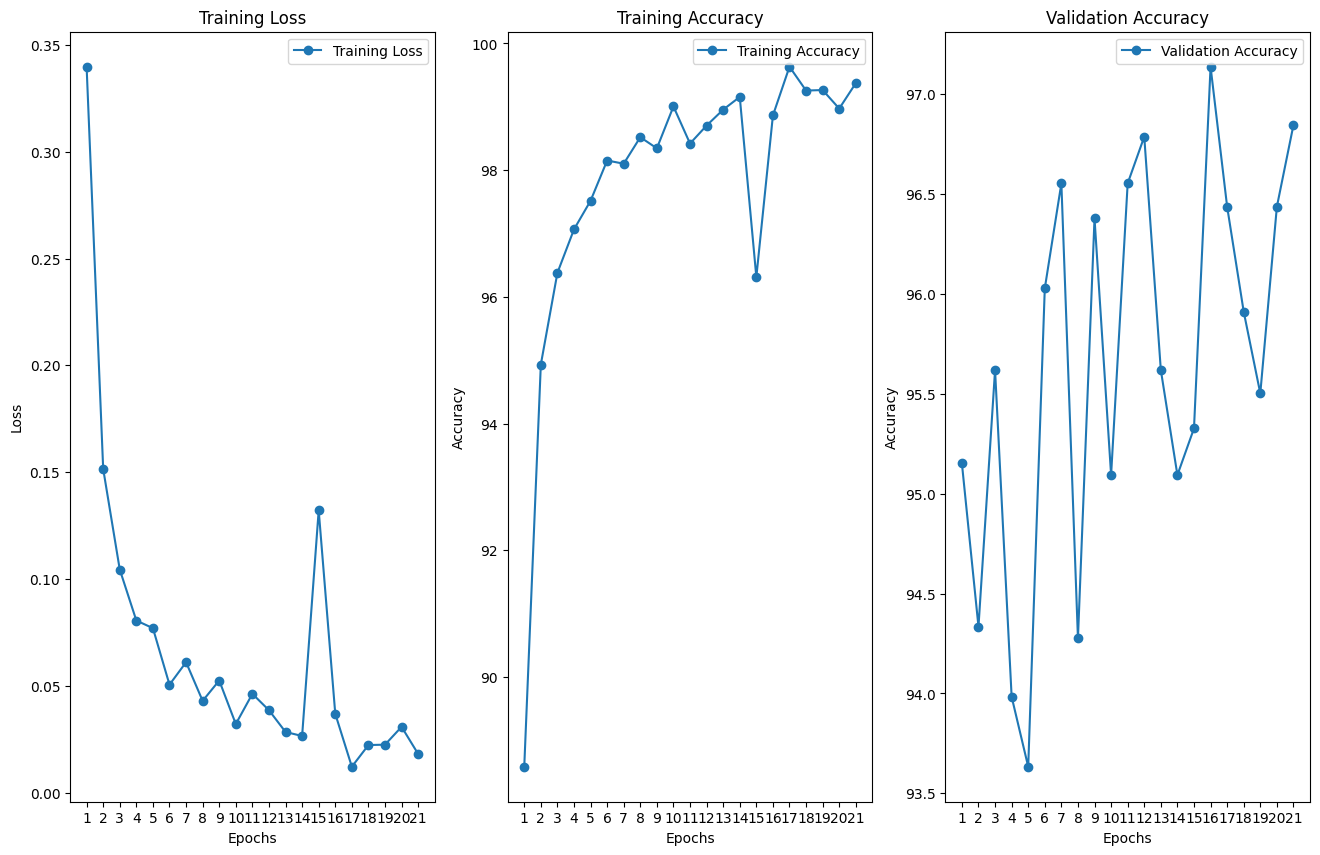

==> Evaluating on Training Set...
Confusion Matrix: 
[[ 850    0    0    2    0    0    0    0]
 [   0 2180    0    1    0    0    0    0]
 [   0    0 1083    0    0    0    0    2]
 [   0    1    1 2021    0    1    2    0]
 [   2    0    0    4  843    0    0    0]
 [   4    0    0   19    0  970    0    0]
 [   2    0    0    2    0    0 2326    0]
 [   0    0    0    0    0    0    0 1643]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       852
           1       1.00      1.00      1.00      2181
           2       1.00      1.00      1.00      1085
           3       0.99      1.00      0.99      2026
           4       1.00      0.99      1.00       849
           5       1.00      0.98      0.99       993
           6       1.00      1.00      1.00      2330
           7       1.00      1.00      1.00      1643

    accuracy                           1.00     11959
   macro avg       1.00      1.00   

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import medmnist
import timm
from medmnist import BloodMNIST, INFO
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set random seed
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

# Dataset information
data_flag = 'bloodmnist'
info = INFO[data_flag]
n_classes = len(info['label'])
classes = info['label']
BloodMNIST = getattr(medmnist, info['python_class'])

# Preprocessing
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# Load datasets
train_dataset = BloodMNIST(split="train", download=True, transform=data_transform)
val_dataset = BloodMNIST(split="val", download=True, transform=data_transform)
test_dataset = BloodMNIST(split='test', transform=data_transform, download=True)

# Data loaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Custom Hybrid Modelclass CustomHybridModel(nn.Module):
class CustomHybridModel(nn.Module):
    def __init__(self, num_classes):
        super(CustomHybridModel, self).__init__()
        # Load the models with pretrained weights but without the final classification layers
        self.swin = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=0)
        self.efficientnet = timm.create_model('efficientnet_b3', pretrained=True, num_classes=0)

        # Adjust the classifier to combine the outputs of the last layers of both models
        swin_feature_size = self.swin.num_features
        efficientnet_feature_size = self.efficientnet.num_features

        self.classifier = nn.Linear(swin_feature_size + efficientnet_feature_size, num_classes)

    def forward(self, x):
        swin_features = self.swin(x)
        efficientnet_features = self.efficientnet(x)
        combined = torch.cat((swin_features, efficientnet_features), dim=1)
        return self.classifier(combined)

# Initialize model
model = CustomHybridModel(num_classes=n_classes)

# Set device to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Directories for saving outputs
os.makedirs("models", exist_ok=True)

# Implement early stopping mechanism
early_stopping_patience = 5
no_improvement_epochs = 0
best_val_accuracy = 0

# Evaluation Function (Corrected)
def evaluate_model(loader):
    model.eval()
    total_correct = 0
    total = 0
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.squeeze()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    print(f'Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}')
    print(f'Classification Report: \n{classification_report(y_true, y_pred, target_names=classes)}')
    print(total_correct)
    print(total)
    accuracy = 100 * total_correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy, y_true, y_pred

NUM_EPOCHS = 35

# Training and Validation Metrics
train_losses = []
train_accuracies = []
test_accuracies = []
# Training loop
for epoch in range(NUM_EPOCHS):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        labels = labels.squeeze().long()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Compute training metrics
    epoch_loss = train_loss / len(train_loader)
    epoch_accuracy = 100 * train_correct / train_total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)


    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}: Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.2f}%')
    # Evaluate on validation set (instead of test set)
    val_accuracy, _, _ = evaluate_model(val_loader)
    print(f'Epoch {epoch + 1}/{NUM_EPOCHS}: Validation Accuracy: {val_accuracy}')
    test_accuracies.append(val_accuracy)

    # Check for early stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_epochs = 0
        # Save the best model
        best_model_state_dict = model.state_dict()
    else:
        no_improvement_epochs += 1
        if no_improvement_epochs >= early_stopping_patience:
            print(f"Early stopping triggered at epoch {epoch + 1}")
            break

# Save the best model
best_model_filename = f"models/{data_flag}_best_model.pt"
torch.save(best_model_state_dict, best_model_filename)

# Plotting with dots at each epoch
plt.figure(figsize=(16, 10))

# Plot for Training Loss
plt.subplot(1, 3, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xticks(range(1, len(train_losses) + 1))  # Ensure x-axis ticks match the number of epochs
plt.legend()

# Plot for Training and Validation Accuracy
plt.subplot(1, 3, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.xticks(range(1, len(train_accuracies) + 1))  # Ensure x-axis ticks match the number of epochs
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Validation Accuracy', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.xticks(range(1, len(test_accuracies) + 1)) # Ensure x-axis ticks match the number of epochs
plt.legend()

plt.show()


# Evaluate on training and test sets
print('==> Evaluating on Training Set...')
train_accuracy, y_true, y_pred = evaluate_model(train_loader)
print(f'Training Set Accuracy: {train_accuracy:.2f}%')
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))

print('==> Evaluating on Test Set...')
test_accuracy, y_true, y_pred = evaluate_model(val_loader)
print(f'Test Set Accuracy: {test_accuracy:.2f}%')
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))

Image shape: torch.Size([32, 3, 224, 224])
Label shape: torch.Size([32])
Saliency shape: torch.Size([3, 224, 224])


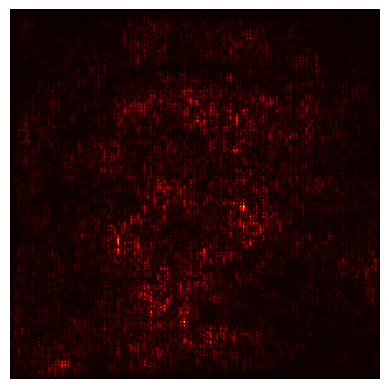

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the best model
model.load_state_dict(torch.load(best_model_filename))
model.to(device)
model.eval()

# Select one image and its label from your dataset
# Assuming `test_loader` is your DataLoader for the test set
images, labels = next(iter(test_loader))
labels = labels.squeeze().long()

# Move the images and labels to the device
images, labels = images.to(device), labels.to(device)
print(f"Image shape: {images.shape}")
print(f"Label shape: {labels.shape}")

# Select only the first image and its label
image = images[0:1].to(device)  # Select only the first image
label = labels[0].unsqueeze(0).to(device)  # Select the first label and maintain it as a batch

# Set requires_grad to True to compute gradients with respect to the input image
image.requires_grad_()

# Forward pass
output = model(image)

# Compute the loss
loss = criterion(output, label)
model.zero_grad()
loss.backward()

# Saliency is the absolute value of the gradient
saliency = image.grad.data.abs()

# Squeeze the saliency tensor to remove the batch dimension
saliency = saliency.squeeze()
print(f"Saliency shape: {saliency.shape}")
# Convert the saliency tensor to a numpy array and transpose it to (height, width, channels)
saliency_map = saliency.cpu().numpy().transpose(1, 2, 0)

# Since the saliency map is a single-channel image, take the mean across the channels to get a 2D array
saliency_map = np.mean(saliency_map, axis=2)

# Visualize and save the saliency map
plt.imshow(saliency_map, cmap=plt.cm.hot)
plt.axis('off')
plt.savefig('saliency_map.png')  # Save the figure
plt.show()

Image shape: torch.Size([32, 3, 224, 224])
Label shape: torch.Size([32])


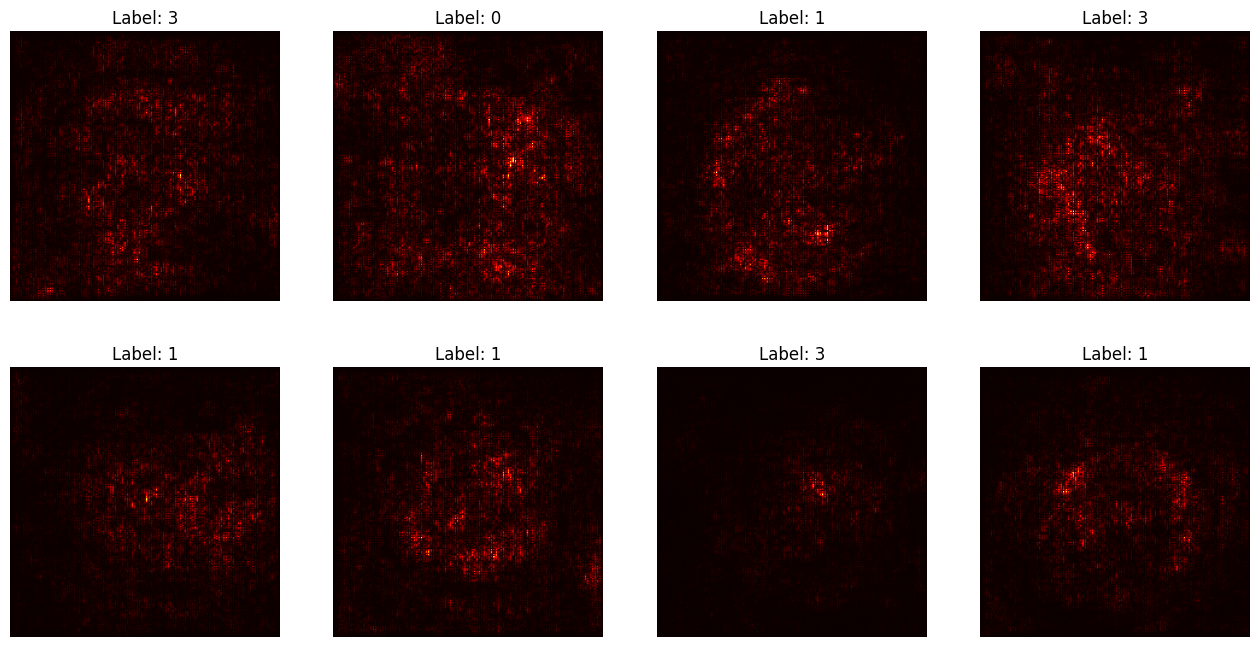

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the best model
model.load_state_dict(torch.load(best_model_filename))
model.to(device)
model.eval()

# Select eight images and their labels from your dataset
# Assuming `test_loader` is your DataLoader for the test set
images, labels = next(iter(test_loader))
labels = labels.squeeze().long()

# Move the images and labels to the device
images, labels = images.to(device), labels.to(device)
print(f"Image shape: {images.shape}")
print(f"Label shape: {labels.shape}")

# Select the first eight images and their labels
images_batch = images[:8]
labels_batch = labels[:8]

# Set requires_grad to True to compute gradients with respect to the input image
images_batch.requires_grad_()

# Forward pass
output = model(images_batch)

# Compute the loss for each image in the batch
loss = criterion(output, labels_batch)
model.zero_grad()
loss.backward()

# Initialize a list to store the saliency maps
saliency_maps = []

# Compute saliency maps for each image in the batch
for i in range(8):
    saliency = images_batch.grad[i].data.abs()
    saliency = saliency.squeeze()

    # Convert the saliency tensor to a numpy array and transpose it to (height, width, channels)
    saliency_map = saliency.cpu().numpy().transpose(1, 2, 0)

    # Since the saliency map is a single-channel image, take the mean across the channels to get a 2D array
    saliency_map = np.mean(saliency_map, axis=2)

    saliency_maps.append(saliency_map)

# Visualize and save the saliency maps
plt.figure(figsize=(16, 8))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(saliency_maps[i], cmap=plt.cm.hot)
    plt.title(f"Label: {labels_batch[i].item()}")
    plt.axis('off')

plt.savefig('saliency_maps.png', dpi=600)  # Save the figure
plt.show()

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the best model
model.load_state_dict(torch.load(best_model_filename))
model.to(device)
model.eval()

# Select eight images and their labels from your dataset
# Assuming `test_loader` is your DataLoader for the test set
images, labels = next(iter(test_loader))
labels = labels.squeeze().long()

# Move the images and labels to the device
images, labels = images.to(device), labels.to(device)
print(f"Image shape: {images.shape}")
print(f"Label shape: {labels.shape}")

# Select the first eight images and their labels
images_batch = images[:8]
labels_batch = labels[:8]

# Set requires_grad to True to compute gradients with respect to the input image
images_batch.requires_grad_()

# Forward pass
output = model(images_batch)

# Compute the loss for each image in the batch
loss = criterion(output, labels_batch)
model.zero_grad()
loss.backward()

# Initialize a list to store the saliency maps
saliency_maps = []

# Compute saliency maps for each image in the batch
for i in range(8):
    saliency = images_batch.grad[i].data.abs()
    saliency = saliency.squeeze()

    # Convert the saliency tensor to a numpy array and transpose it to (height, width, channels)
    saliency_map = saliency.cpu().numpy().transpose(1, 2, 0)

    # Since the saliency map is a single-channel image, take the mean across the channels to get a 2D array
    saliency_map = np.mean(saliency_map, axis=2)

    saliency_maps.append(saliency_map)

# Visualize and save the saliency maps
plt.figure(figsize=(16, 8))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(saliency_maps[i], cmap=plt.cm.viridis)
    plt.title(f"Label: {labels_batch[i].item()}")
    plt.axis('off')

plt.savefig('saliency_maps.png', dpi=600)  # Save the figure
plt.show()

Image shape: torch.Size([32, 3, 224, 224])
Label shape: torch.Size([32])


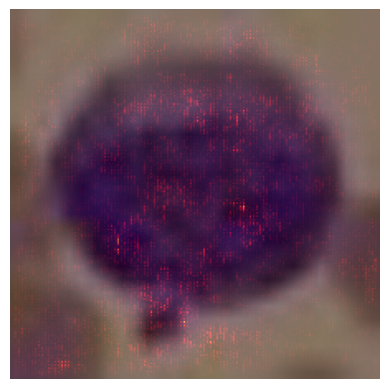

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the best model
model.load_state_dict(torch.load(best_model_filename))
model.to(device)
model.eval()

# Select one image and its label from your dataset
# Assuming `test_loader` is your DataLoader for the test set
images, labels = next(iter(test_loader))
labels = labels.squeeze().long()

# Move the images and labels to the device
images, labels = images.to(device), labels.to(device)
print(f"Image shape: {images.shape}")
print(f"Label shape: {labels.shape}")

# Select only the first image and its label
image = images[0:1].to(device)  # Select only the first image
label = labels[0].unsqueeze(0).to(device)  # Select the first label and maintain it as a batch

# Set requires_grad to True to compute gradients with respect to the input image
image.requires_grad_()

# Forward pass
output = model(image)

# Compute the loss
loss = criterion(output, label)
model.zero_grad()
loss.backward()

# Saliency is the absolute value of the gradient
saliency = image.grad.data.abs().squeeze()

# Convert the saliency tensor to a numpy array and take the maximum across the channels
saliency_map = saliency.cpu().numpy().max(axis=0)

# Normalize the original image for display
image_display = images[0].cpu().numpy().transpose(1, 2, 0)
image_display = (image_display - image_display.min()) / (image_display.max() - image_display.min())

# Overlay the saliency map on the original image
plt.imshow(image_display)
plt.imshow(saliency_map, cmap=plt.cm.hot, alpha=0.5)  # Alpha controls the transparency
plt.axis('off')
plt.savefig('saliency_map_overlay.png')  # Save the figure
plt.show()

Image shape: torch.Size([32, 3, 224, 224])
Label shape: torch.Size([32])


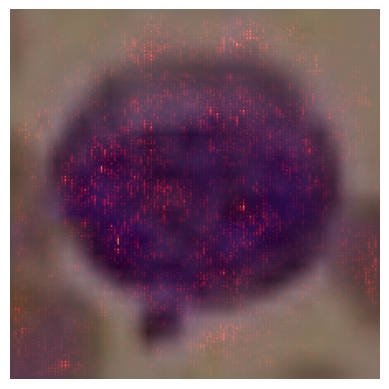

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the best model
model.load_state_dict(torch.load(best_model_filename))
model.to(device)
model.eval()

# Select one image and its label from your dataset
# Assuming `test_loader` is your DataLoader for the test set
images, labels = next(iter(test_loader))
labels = labels.squeeze().long()

# Move the images and labels to the device
images, labels = images.to(device), labels.to(device)
print(f"Image shape: {images.shape}")
print(f"Label shape: {labels.shape}")

# Select only the first image and its label
image = images[0:1].to(device)  # Select only the first image
label = labels[0].unsqueeze(0).to(device)  # Select the first label and maintain it as a batch

# Set requires_grad to True to compute gradients with respect to the input image
image.requires_grad_()

# Forward pass
output = model(image)

# Compute the loss
loss = criterion(output, label)
model.zero_grad()
loss.backward()

# Saliency is the absolute value of the gradient
saliency = image.grad.data.abs().squeeze()

# Convert the saliency tensor to a numpy array and take the maximum across the channels
saliency_map = saliency.cpu().numpy().max(axis=0)

# Normalize the original image for display
image_display = images[0].cpu().numpy().transpose(1, 2, 0)
image_display = (image_display - image_display.min()) / (image_display.max() - image_display.min())

# Overlay the saliency map on the original image
plt.imshow(image_display)
plt.imshow(saliency_map, cmap=plt.cm.hot, alpha=0.5)  # Alpha controls the transparency
plt.axis('off')
plt.savefig('saliency_map_overlay.png')  # Save the figure
plt.show()

Image shape: torch.Size([32, 3, 224, 224])
Label shape: torch.Size([32])


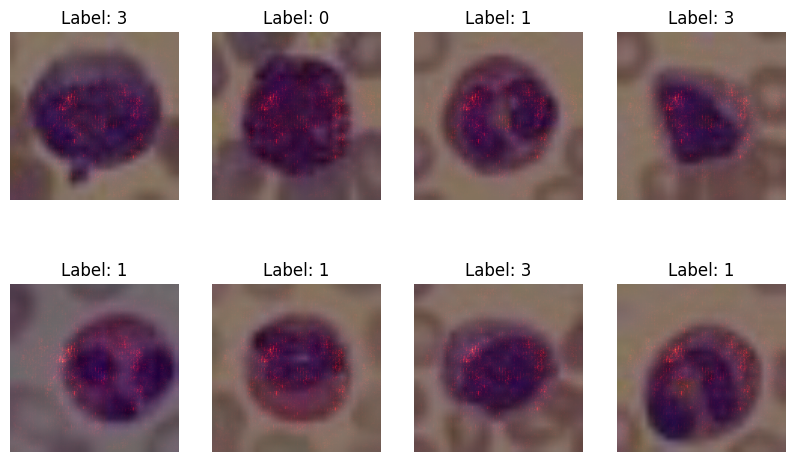

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the best model
model.load_state_dict(torch.load(best_model_filename))
model.to(device)
model.eval()

# Select eight images and their labels from your dataset
# Assuming `test_loader` is your DataLoader for the test set
images, labels = next(iter(test_loader))
labels = labels.squeeze().long()

# Move the images and labels to the device
images, labels = images.to(device), labels.to(device)
print(f"Image shape: {images.shape}")
print(f"Label shape: {labels.shape}")

# Select the first eight images and their labels
num_images_to_display = 8
images_to_display = images[:num_images_to_display]
labels_to_display = labels[:num_images_to_display]


# Set requires_grad to True to compute gradients with respect to the input images
images_to_display.requires_grad_()

# Forward pass
outputs = model(images_to_display)

# Compute the loss for each image
losses = criterion(outputs, labels_to_display)
model.zero_grad()
losses.backward()

# Calculate the saliency maps for each image
saliency_maps = images_to_display.grad.data.abs().squeeze()

# Normalize the original images for display
images_display = images_to_display.cpu().detach().numpy()
images_display = (images_display - images_display.min()) / (images_display.max() - images_display.min())

# Display the original images and their saliency maps
plt.figure(figsize=(10, 6))
for i in range(num_images_to_display):
    #plt.subplot(4, num_images_to_display, i + 1)

    #plt.subplot(4, num_images_to_display, i + num_images_to_display + 1)
    plt.subplot(2, 4, i + 1)
    saliency_map = saliency_maps[i].cpu().numpy()

    # Convert the saliency tensor to a numpy array and take the maximum across the channels
    saliency_map = saliency.cpu().numpy().max(axis=0)
    plt.title(f"Label: {labels_to_display[i].item()}")

    plt.imshow(images_display[i].transpose(1, 2, 0))
    plt.imshow(saliency_map, cmap=plt.cm.hot, alpha=0.5)
    plt.axis('off')

plt.savefig('saliency_maps_overlay.png', dpi=600)  # Save the figure
plt.show()


Image shape: torch.Size([32, 3, 224, 224])
Label shape: torch.Size([32])


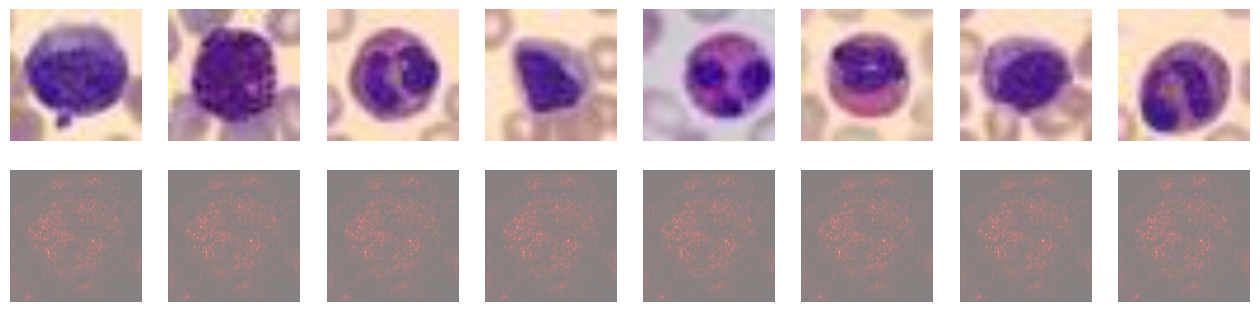

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the best model
model.load_state_dict(torch.load(best_model_filename))
model.to(device)
model.eval()

# Select eight images and their labels from your dataset
# Assuming `test_loader` is your DataLoader for the test set
images, labels = next(iter(test_loader))
labels = labels.squeeze().long()

# Move the images and labels to the device
images, labels = images.to(device), labels.to(device)
print(f"Image shape: {images.shape}")
print(f"Label shape: {labels.shape}")

# Select the first eight images and their labels
num_images_to_display = 8
images_to_display = images[:num_images_to_display]
labels_to_display = labels[:num_images_to_display]

# Set requires_grad to True to compute gradients with respect to the input images
images_to_display.requires_grad_()

# Forward pass
outputs = model(images_to_display)

# Compute the loss for each image
losses = criterion(outputs, labels_to_display)
model.zero_grad()
losses.backward()

# Calculate the saliency maps for each image
saliency_maps = images_to_display.grad.data.abs().squeeze()

# Normalize the original images for display
images_display = images_to_display.cpu().detach().numpy()
images_display = (images_display - images_display.min()) / (images_display.max() - images_display.min())

# Display the original images and their saliency maps
plt.figure(figsize=(16, 8))
for i in range(num_images_to_display):
    plt.subplot(4, num_images_to_display, i + 1)
    plt.imshow(images_display[i].transpose(1, 2, 0))
    plt.axis('off')

    plt.subplot(4, num_images_to_display, i + num_images_to_display + 1)
    saliency_map = saliency_maps[i].cpu().numpy()

    # Convert the saliency tensor to a numpy array and take the maximum across the channels
    saliency_map = saliency.cpu().numpy().max(axis=0)

    plt.imshow(saliency_map, cmap=plt.cm.hot, alpha=0.5)
    plt.axis('off')

plt.savefig('saliency_maps_overlay.png')  # Save the figure
plt.show()
